# COVID-19 analysis

- <https://github.com/Kamaropoulos/covid19py>

Note that the JHU data source is not providing recovery data at this time ([reference](https://github.com/ExpDev07/coronavirus-tracker-api/blob/master/README.md#recovered-cases-showing-0)).

Another source of data might be the following: <https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data>

## data sources (acquired reliably from CERN)

```Bash
mkdir COVID19
cd COVID19
virtualenv -p python3.6 COVID19
source COVID19/bin/activate
pip3.6 install pip --upgrade
pip3.6 install jupyter matplotlib numpy pandas requests seaborn
pip3.6 install COVID19Py
python3.6
```

```Python
import COVID19Py
import numpy as np
import pandas as pd

import json
import pickle
from uuid import uuid4

def uuid4_short():
    return str(uuid4()).split('-')[0]

def new_filename(ext='.pkl', verbose=True):
    filename = uuid4_short()+ext
    if verbose:
        print(filename)
    return filename

# 2020-09-06T1846Z default API https://coronavirus-tracker-api.herokuapp.com/v2 down, alternative https://covid-tracker-us.herokuapp.com/v2 up
covid19 = COVID19Py.COVID19('https://covid-tracker-us.herokuapp.com')
data = covid19.getAll(timelines=True)

with open(new_filename(), 'wb') as f:
    pickle.dump(data, f)
```

In [1]:
import json
import pickle
from uuid import uuid4
import warnings

import COVID19Py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.labelcolor'] = (1, 1, 1, 0)
pd.set_option("display.max_rows"   , 1000)
pd.set_option("display.max_columns", 1000)
sns.set_palette('husl')
sns.set(style='ticks')
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = [13, 6]
sns.set()

In [3]:
def uuid4_short():
    return str(uuid4()).split('-')[0]
def new_filename(ext='.pkl', verbose=True):
    filename = uuid4_short()+ext
    if verbose: print(filename)
    return filename

In [4]:
%%time
if 0:
    covid19 = COVID19Py.COVID19(data_source='jhu') # https://github.com/CSSEGISandData/COVID-19
    with open(new_filename(), 'wb') as f:
        pickle.dump(data, f)
    data = covid19.getAll(timelines=True)
    with open(new_filename(), 'wb') as f:
        pickle.dump(data, f)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs


In [5]:
if 1:
    #with open('12338731.pkl', 'rb') as f:
    #    covid19 = pickle.load(f)
    with open('e3e48d96.pkl', 'rb') as f:
        data = pickle.load(f)
    # records:
    # 2020-09-06T1848Z data: e3e48d96.pkl
    # 2020-07-30T1354Z data: c6b11935.pkl
    # 2020-07-15T1438Z data: 02afa4cd.pkl
    # 2020-06-22T1249Z data: 2fa5652b.pkl
    # 2020-06-20T0529Z data: 30a2be6c.pkl
    # 2020-06-03T0604Z data: 3349596c.pkl
    # 2020-05-30T0158Z data: 74ef0466.pkl
    # 2020-05-25T0106Z data: a7180674.pkl
    # 2020-05-18T1412Z data: 411d8cc3.pkl
    # 2020-05-11T1410Z data: 6d5e6f10.pkl
    # 2020-05-03T1505Z data: b3e37289.pkl
    # 2020-04-30T1228Z data: e755d4a0.pkl
    # 2020-04-27T1146Z data: 9986b353.pkl
    # 2020-04-25T0122Z data: edd11ae3.pkl
    # 2020-04-23T1127Z data: d3284a31.pkl
    # 2020-04-19T1002Z data: c3733293.pkl
    # 2020-04-18T0918Z data: 289efaac.pkl
    # 2020-04-17T0818Z data: 13921a54.pkl
    # 2020-04-16T0745Z data: a0c99473.pkl
    # 2020-04-14T0844Z data: ad724da4.pkl
    # 2020-04-13T2005Z data: 65882db6.pkl
    # 2020-04-12T0527z data: d5fb657f.pkl
    # 2020-04-11T2322Z data: 2ed0a4f8.pkl
    # 2020-04-10T1904Z data: 7a48429f.pkl
    # 2020-04-09T0544Z data: 5f3d2ff9.pkl
    # 2020-04-08T0616Z data: 741cd4d4.pkl
    # 2020-04-07       data: 120141ce.pkl

#latest = covid19.getLatest()
#locations = covid19.getLocations(timelines=True)

df = pd.DataFrame(data['locations'])
df.head()
#df

id      country country_code  country_population province  \
0   0  Afghanistan           AF          37172386.0            
1   1      Albania           AL           2866376.0            
2   2      Algeria           DZ          42228429.0            
3   3      Andorra           AD             77006.0            
4   4       Angola           AO          30809762.0            

                  last_updated  \
0  2020-09-06T18:38:40.319843Z   
1  2020-09-06T18:38:40.352291Z   
2  2020-09-06T18:38:40.402562Z   
3  2020-09-06T18:38:40.445955Z   
4  2020-09-06T18:38:40.471228Z   

                                         coordinates  \
0  {'latitude': '33.93911', 'longitude': '67.7099...   
1    {'latitude': '41.1533', 'longitude': '20.1683'}   
2     {'latitude': '28.0339', 'longitude': '1.6596'}   
3     {'latitude': '42.5063', 'longitude': '1.5218'}   
4   {'latitude': '-11.2027', 'longitude': '17.8739'}   

                                              latest  \
0  {'confirmed': 38324, 'deaths': 1409, 'recovere...   
1  {'confirmed': 10102, 'deaths': 312, 'recovered...   
2  {'confirmed': 46071, 'deaths': 1549, 'recovere...   
3  {'confirmed': 1215, 'deaths': 53, 'recovered':...   
4  {'confirmed': 2935, 'deaths': 117, 'recovered'...   

                                           timelines  
0  {'confirmed': {'latest': 38324, 'timeline': {'...  
1  {'confirmed': {'latest': 10102, 'timeline': {'...  
2  {'confirmed': {'latest': 46071, 'timeline': {'...  
3  {'confirmed': {'latest': 1215, 'timeline': {'2...  
4  {'confirmed': {'latest': 2935, 'timeline': {'2...

In [6]:
print(list(dict.fromkeys(list(df['country'].values))))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indones

In [7]:
locations = {}

def process(location):
    location = location['timelines'].values[0]

    confirmed = pd.DataFrame(list(location['confirmed']['timeline'].items()), columns=['datetime', 'confirmed'])
    deaths    = pd.DataFrame(list(location['deaths']['timeline'].items()),    columns=['datetime', 'deaths'])
    recovered = pd.DataFrame(list(location['recovered']['timeline'].items()), columns=['datetime', 'recovered'])

    confirmed.index = pd.to_datetime(confirmed['datetime']); del confirmed['datetime']
    deaths.index    = pd.to_datetime(deaths['datetime'])   ; del deaths['datetime']
    recovered.index = pd.to_datetime(recovered['datetime']); del recovered['datetime']

    # merge
    location = confirmed
    location['deaths']       = deaths['deaths']
    location['recovered']    = recovered['recovered']

    # visual estimate of changes (with linear interpolation)
    half_mean_of_confirmed_cases = location['confirmed'].mean()/2
    half_mean_of_deaths_cases    = location['deaths'].mean()/2
    location['confirmed_percentage_change']                                     = location['confirmed'].pct_change().replace(0, np.nan).interpolate(method='nearest')
    location['confirmed_percentage_change']                                     = 100*location['confirmed_percentage_change']
    location['confirmed_percentage_change_by_half_mean_confirmed_cases_factor'] = half_mean_of_confirmed_cases*location['confirmed_percentage_change']
    location['deaths_percentage_change']                                        = location['deaths'].pct_change().replace(0, np.nan).interpolate(method='nearest')
    location['deaths_percentage_change']                                        = 100*location['deaths_percentage_change']
    location['deaths_percentage_change_by_half_mean_deaths_cases_factor']       = half_mean_of_confirmed_cases*location['deaths_percentage_change']    

    _location = location
    _location = _location.diff(axis=1)
    location['confirmed_new_cases']  = location['confirmed'].diff(periods=1).replace(0, np.nan).interpolate(method='nearest').interpolate(method='nearest')
    location['deaths_new_cases']     = location['deaths'].diff(periods=1).replace(0, np.nan).interpolate(method='nearest').interpolate(method='nearest')

    # reindex to first confirmed case
    location = location.query('confirmed > 0').reset_index(); del location['datetime']

    display(location.tail())

    #plots
    df_plot = location.drop([
        'confirmed_percentage_change',
        'confirmed_percentage_change_by_half_mean_confirmed_cases_factor',
        'deaths_percentage_change',
        'deaths_percentage_change_by_half_mean_deaths_cases_factor'], axis=1)
    df_plot.plot(title=location_name+' confirmed cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))                   ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
    df_plot.plot(title=location_name+' confirmed cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))           ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

    df_plot = location[['confirmed_percentage_change', 'deaths_percentage_change']]
    df_plot.plot(title=location_name+' percentage change in cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
    df_plot.plot(title=location_name+' percentage change in cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

    df_plot = location[['confirmed_new_cases', 'deaths_new_cases']]
    df_plot.plot(title=location_name+' change in cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('new cases');
    df_plot.plot(title=location_name+' change in cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('new cases');

    return location

# South Korea

confirmed  deaths recovered  confirmed_percentage_change  \
223      20449     326       NaN                     1.322961   
224      20644     329       NaN                     0.953592   
225      20842     331       NaN                     0.959116   
226      21010     333       NaN                     0.806065   
227      21177     334       NaN                     0.794860   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
223                                        6714.227536                 
224                                        4839.622997                 
225                                        4867.661115                 
226                                        4090.900207                 
227                                        4034.032697                 

     deaths_percentage_change  \
223                  0.617284   
224                  0.920245   
225                  0.607903   
226                  0.604230   
227                  0.300300   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
223                                        3132.809454           
224                                        4670.384646           
225                                        3085.198368           
226                                        3066.556686           
227                                        1524.069464           

     confirmed_new_cases  deaths_new_cases  
223                267.0               2.0  
224                195.0               3.0  
225                198.0               2.0  
226                168.0               2.0  
227                167.0               1.0

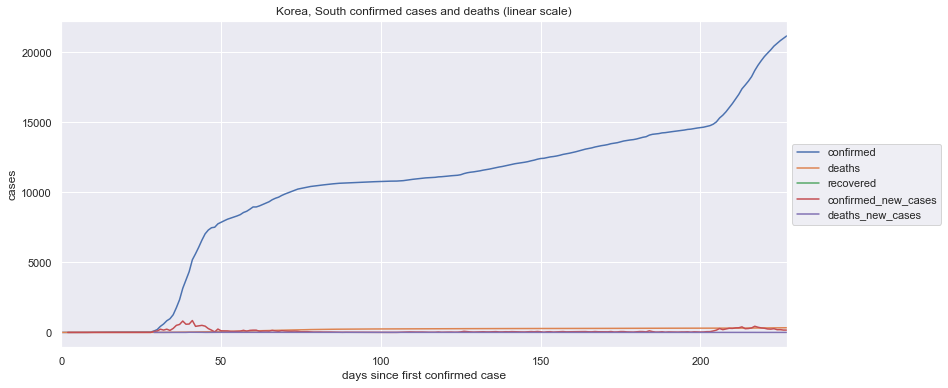

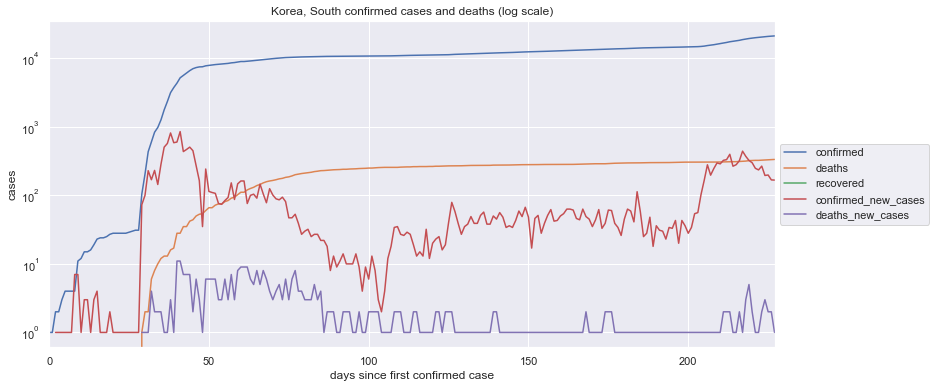

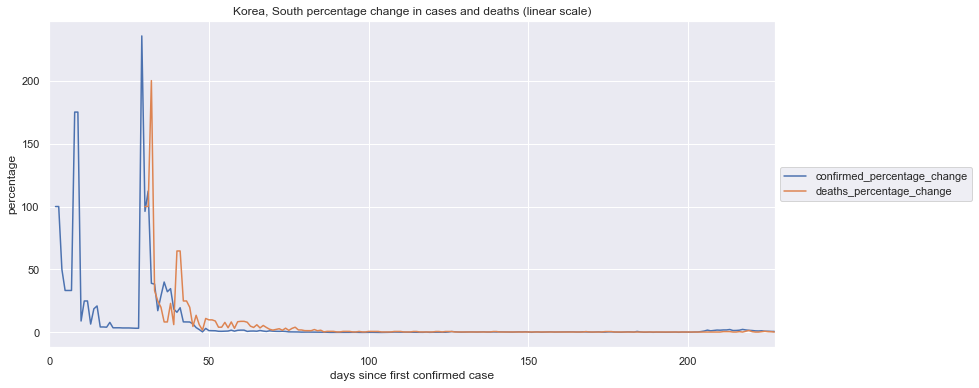

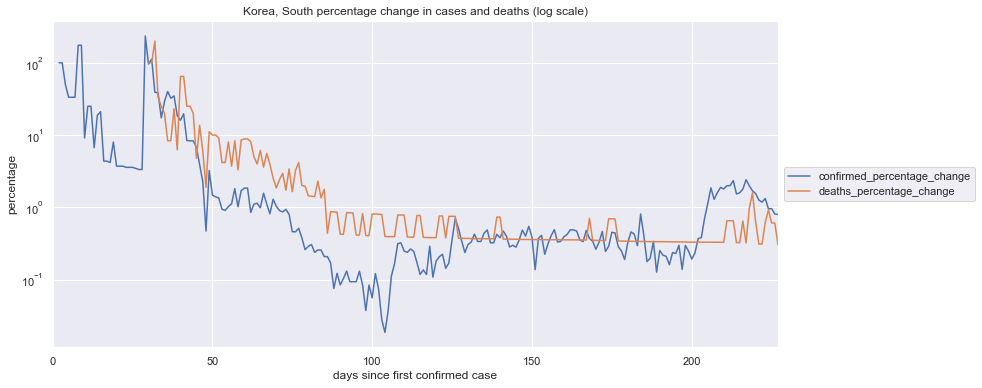

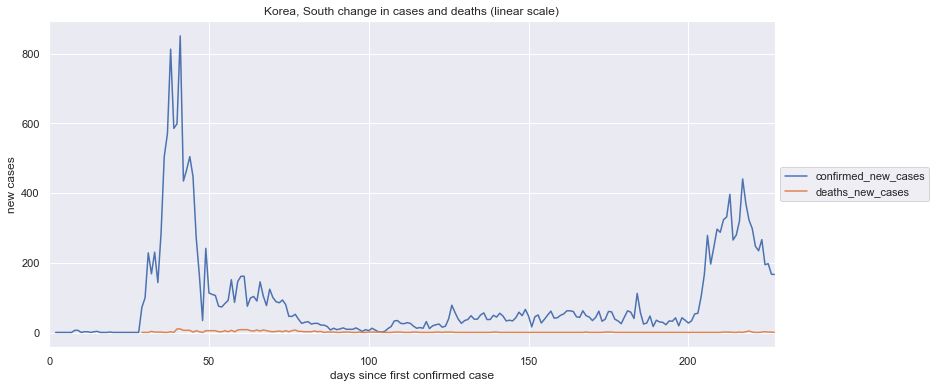

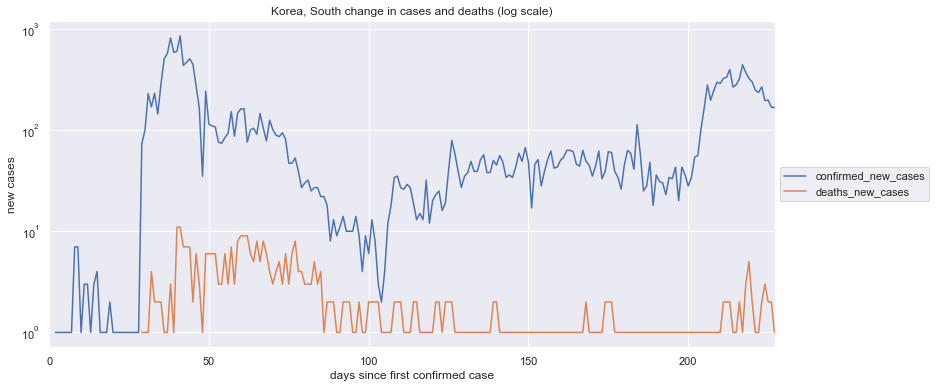

In [8]:
location_name = 'Korea, South'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Belgium

confirmed  deaths  recovered  confirmed_percentage_change  \
210      85487    9897      18457                     0.294477   
211      85911    9898      18490                     0.495982   
212      86544    9899      18513                     0.736809   
213      87174    9901      18534                     0.727953   
214      87825    9906      18555                     0.746782   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
210                                        6066.855477                 
211                                       10218.302814                 
212                                       15179.865531                 
213                                       14997.420691                 
214                                       15385.336632                 

     deaths_percentage_change  \
210                  0.020212   
211                  0.010104   
212                  0.010103   
213                  0.020204   
214                  0.050500   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
210                                         416.415787           
211                                         208.165818           
212                                         208.144787           
213                                         416.247521           
214                                        1040.408598           

     confirmed_new_cases  deaths_new_cases  
210                251.0               2.0  
211                424.0               1.0  
212                633.0               1.0  
213                630.0               2.0  
214                651.0               5.0

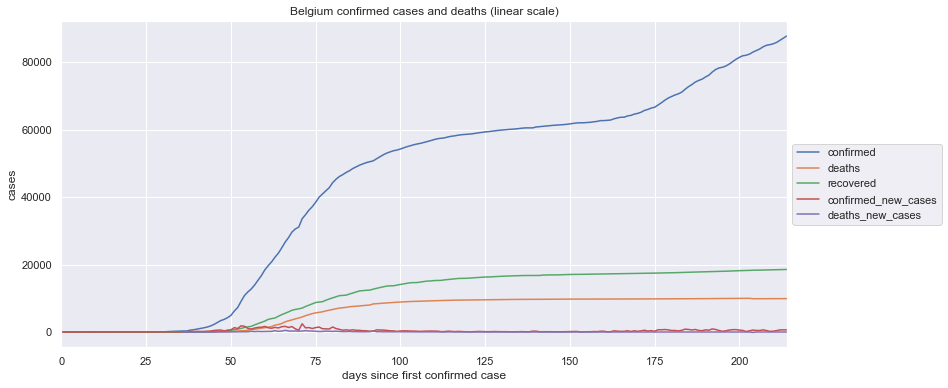

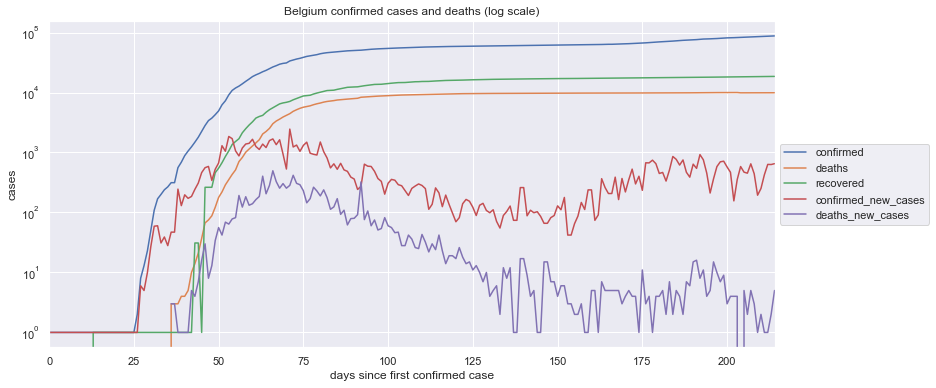

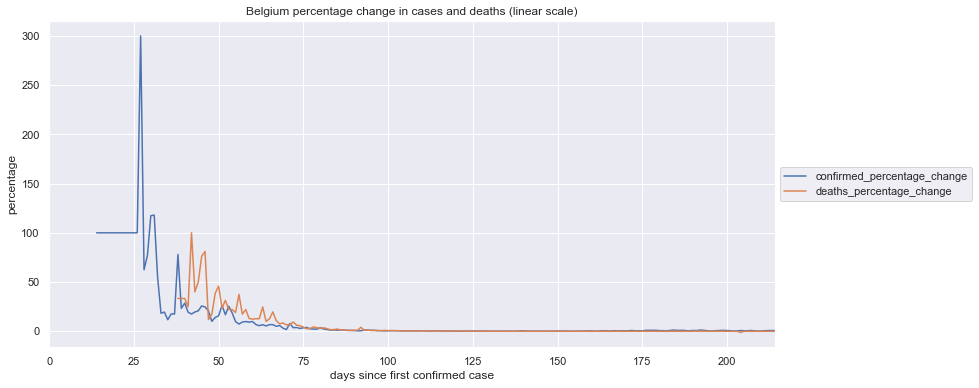

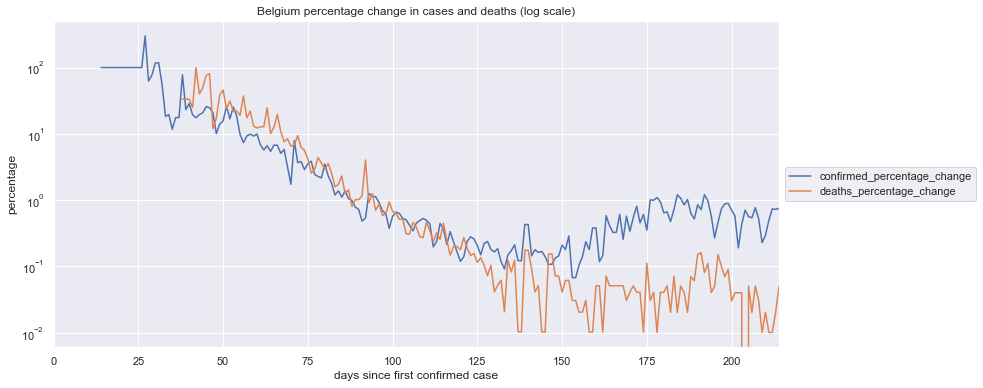

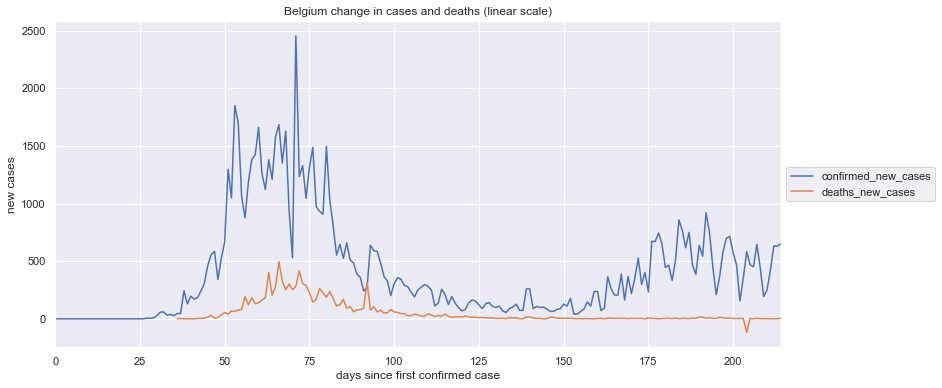

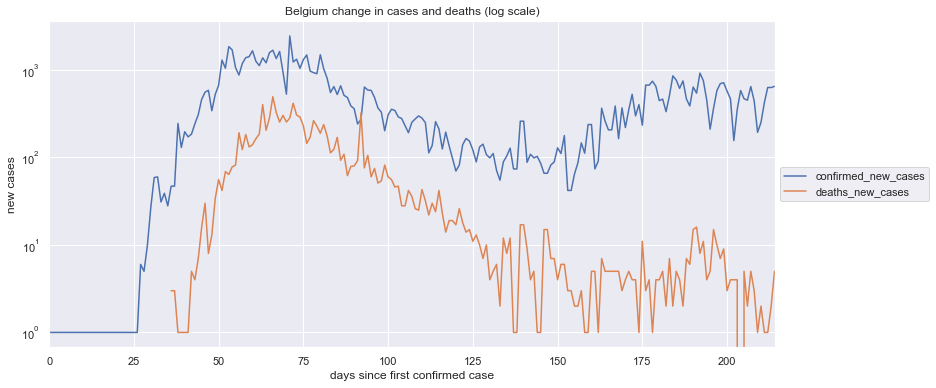

In [9]:
location_name = 'Belgium'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Switzerland

confirmed  deaths recovered  confirmed_percentage_change  \
189      42393    2011       NaN                     0.512127   
190      42763    2011       NaN                     0.872786   
191      43127    2013       NaN                     0.851203   
192      43532    2013       NaN                     0.939087   
193      43957    2013       NaN                     0.976293   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
189                                        5885.195848                 
190                                       10029.757375                 
191                                        9781.739051                 
192                                       10791.669311                 
193                                       11219.232908                 

     deaths_percentage_change  \
189                  0.249252   
190                  0.249252   
191                  0.099453   
192                       NaN   
193                       NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
189                                        2864.322602           
190                                        2864.322602           
191                                        1142.880386           
192                                                NaN           
193                                                NaN           

     confirmed_new_cases  deaths_new_cases  
189                216.0               5.0  
190                370.0               5.0  
191                364.0               2.0  
192                405.0               NaN  
193                425.0               NaN

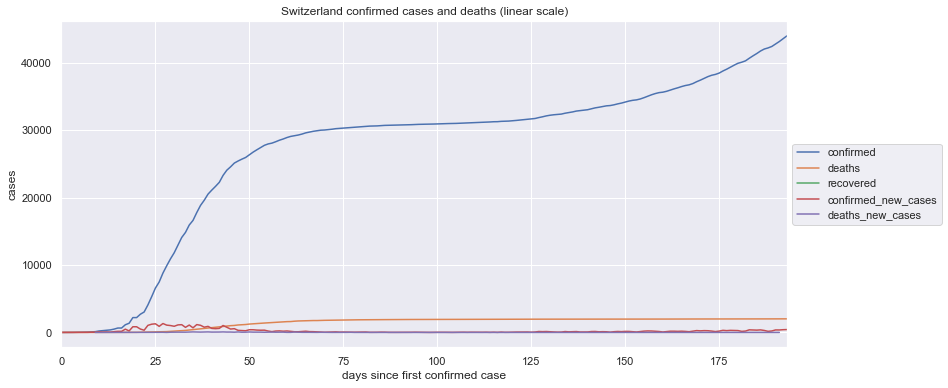

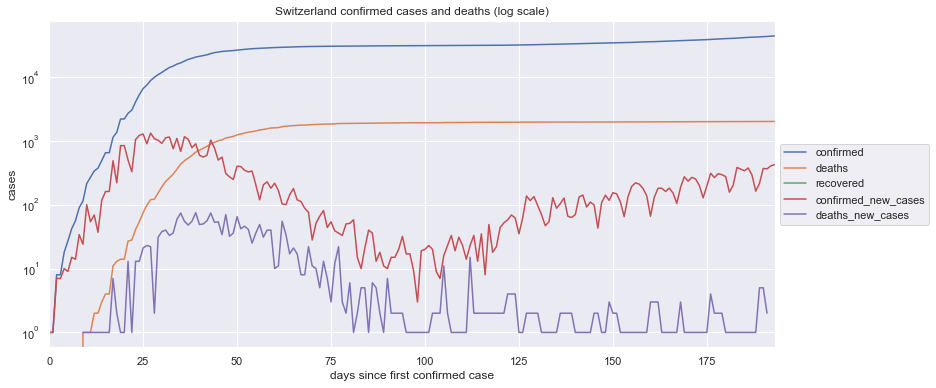

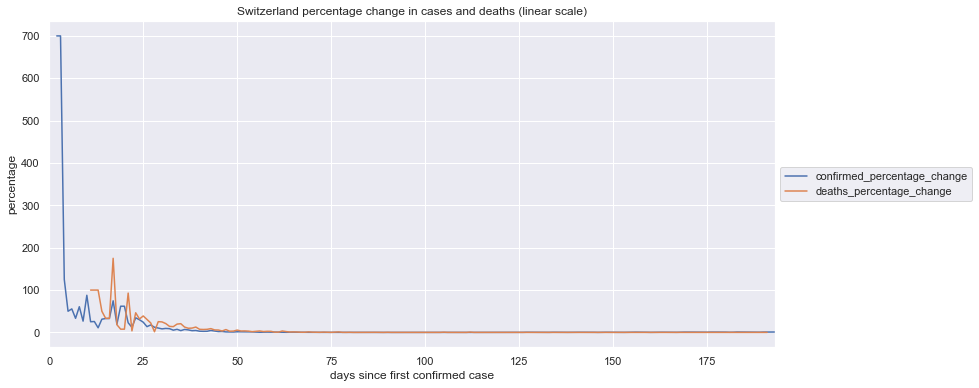

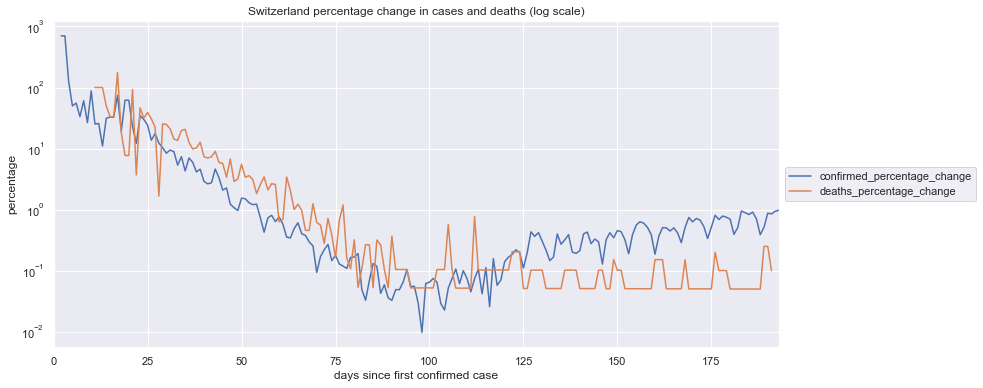

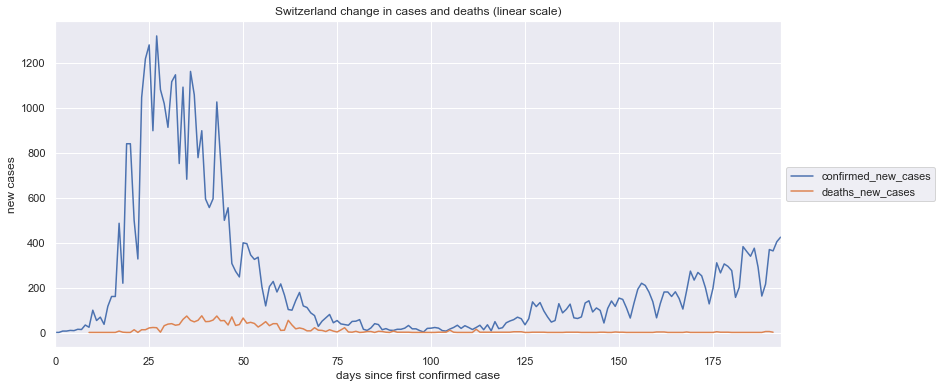

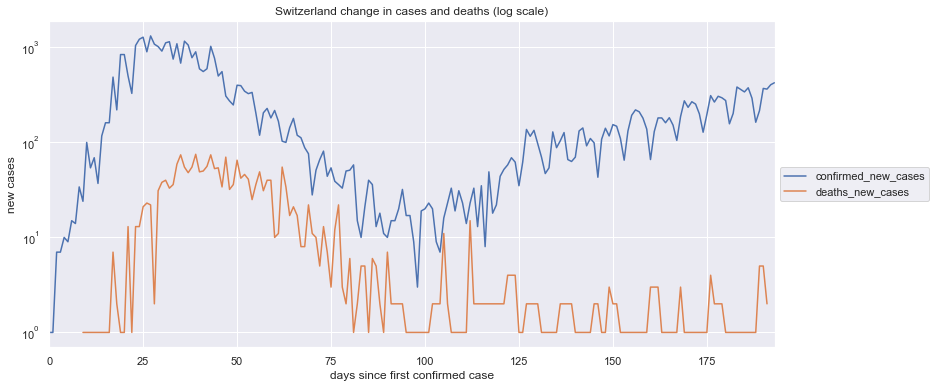

In [10]:
location_name = 'Switzerland'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Greece

confirmed  deaths recovered  confirmed_percentage_change  \
188      10524     271       NaN                     2.006397   
189      10757     273       NaN                     2.213987   
190      10998     278       NaN                     2.240402   
191      11200     279       NaN                     1.836698   
192      11386     280       NaN                     1.660714   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
188                                        2892.463576                 
189                                        3191.729410                 
190                                        3229.809129                 
191                                        2647.821095                 
192                                        2394.119948                 

     deaths_percentage_change  \
188                  1.879699   
189                  0.738007   
190                  1.831502   
191                  0.359712   
192                  0.358423   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
188                                        2709.813184           
189                                        1063.926652           
190                                        2640.330795           
191                                         518.568566           
192                                         516.709898           

     confirmed_new_cases  deaths_new_cases  
188                207.0               5.0  
189                233.0               2.0  
190                241.0               5.0  
191                202.0               1.0  
192                186.0               1.0

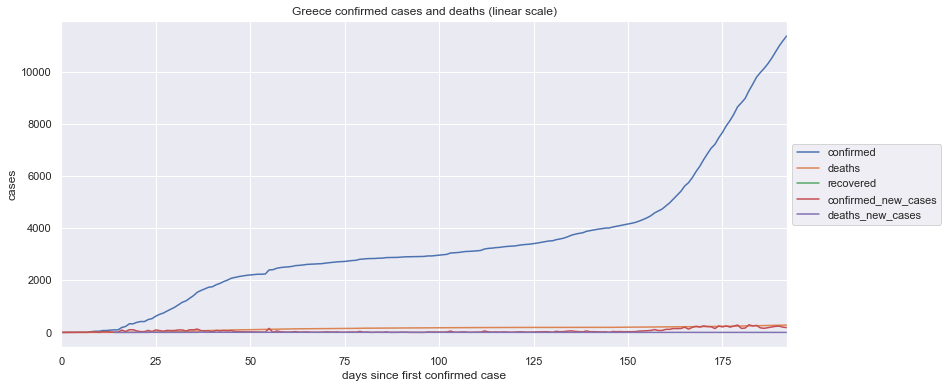

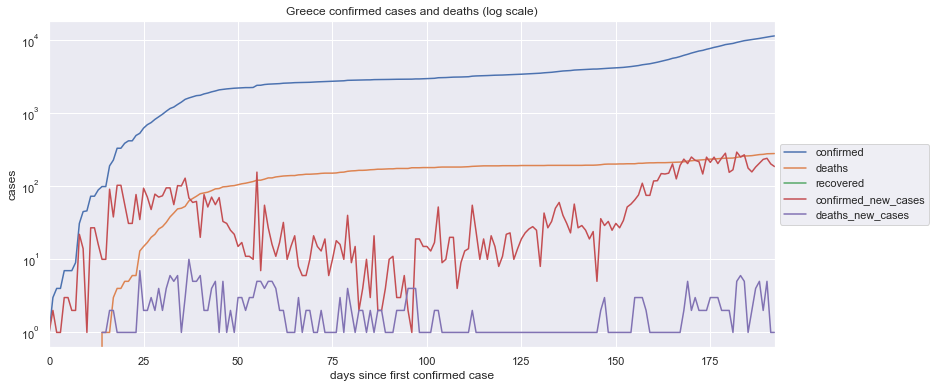

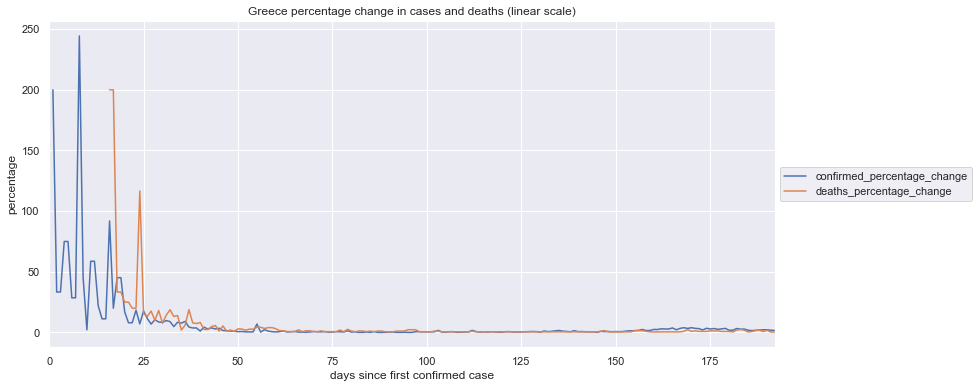

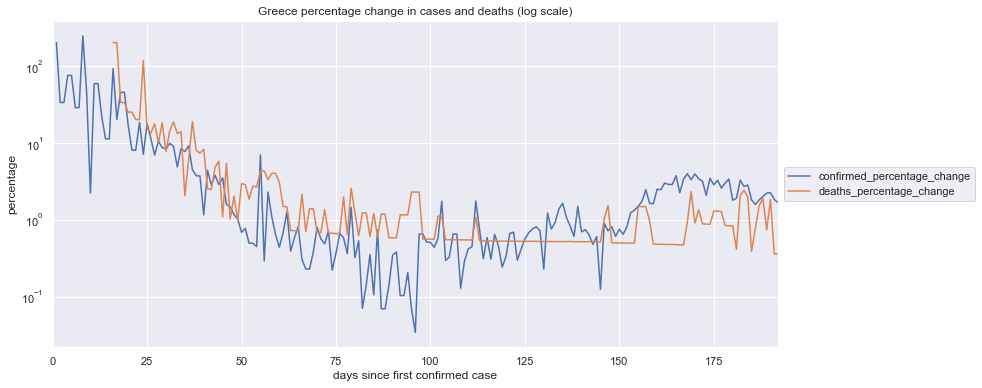

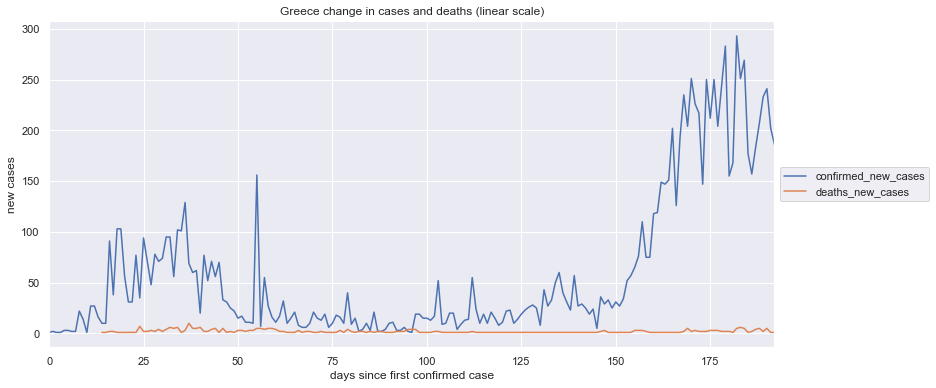

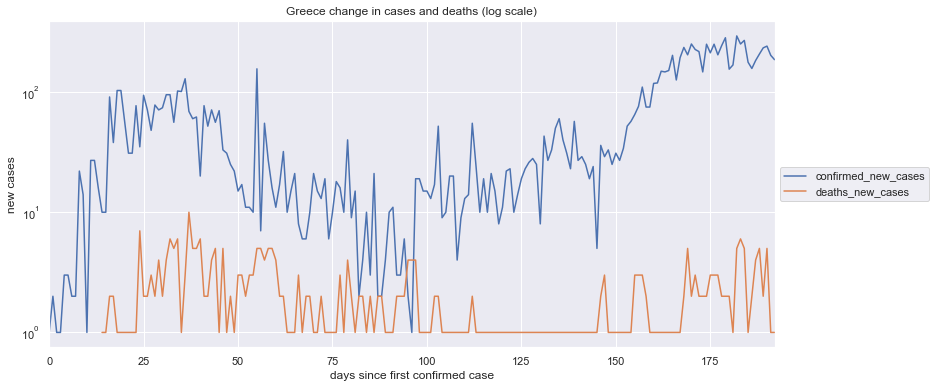

In [11]:
location_name = 'Greece'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Norway

confirmed  deaths recovered  confirmed_percentage_change  \
188      10871     264       NaN                     0.825450   
189      11034     264       NaN                     1.499402   
190      11120     264       NaN                     0.779409   
191      11231     264       NaN                     0.998201   
192      11296     264       NaN                     0.578755   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
188                                        2554.028644                 
189                                        4639.307864                 
190                                        2411.573796                 
191                                        3088.540326                 
192                                        1790.729606                 

     deaths_percentage_change  \
188                       NaN   
189                       NaN   
190                       NaN   
191                       NaN   
192                       NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
188                                                NaN           
189                                                NaN           
190                                                NaN           
191                                                NaN           
192                                                NaN           

     confirmed_new_cases  deaths_new_cases  
188                 89.0               NaN  
189                163.0               NaN  
190                 86.0               NaN  
191                111.0               NaN  
192                 65.0               NaN

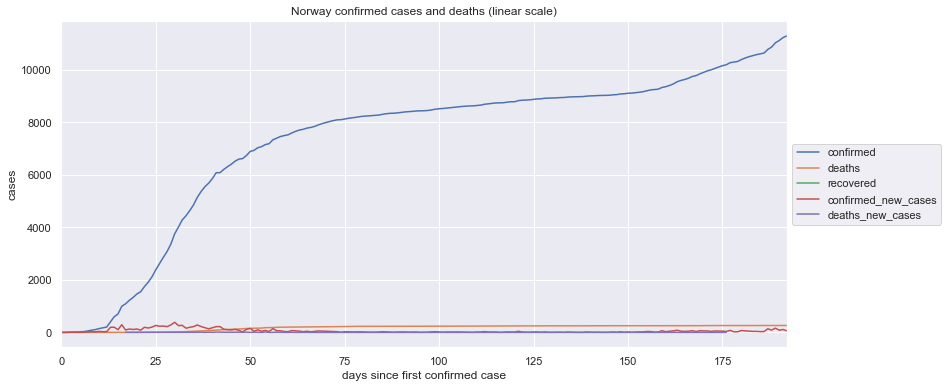

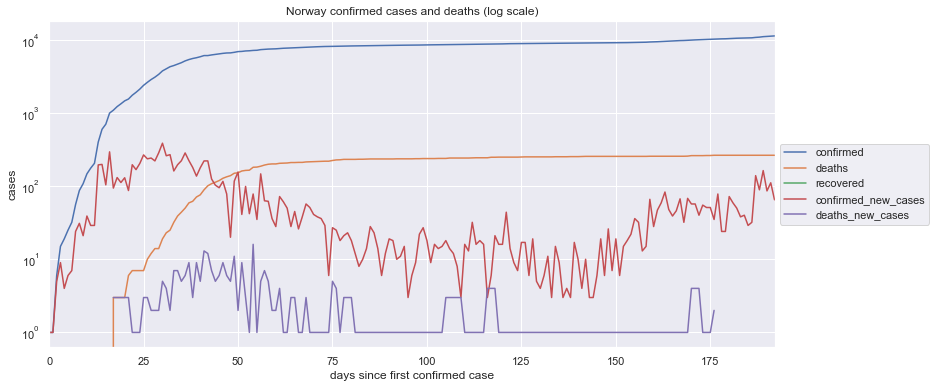

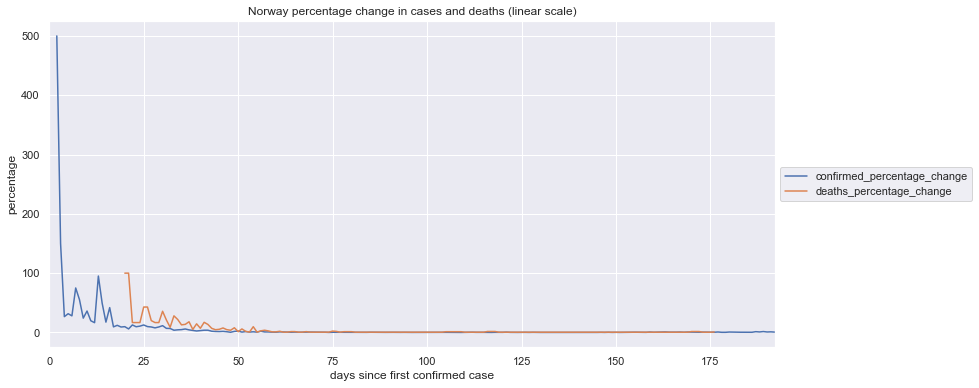

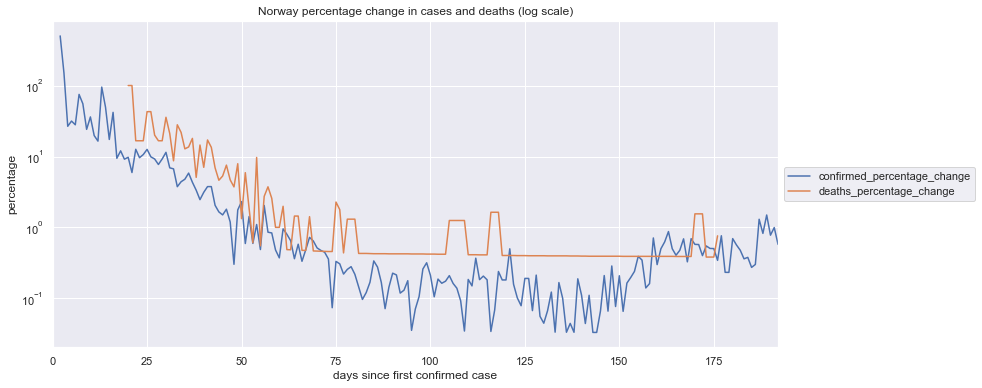

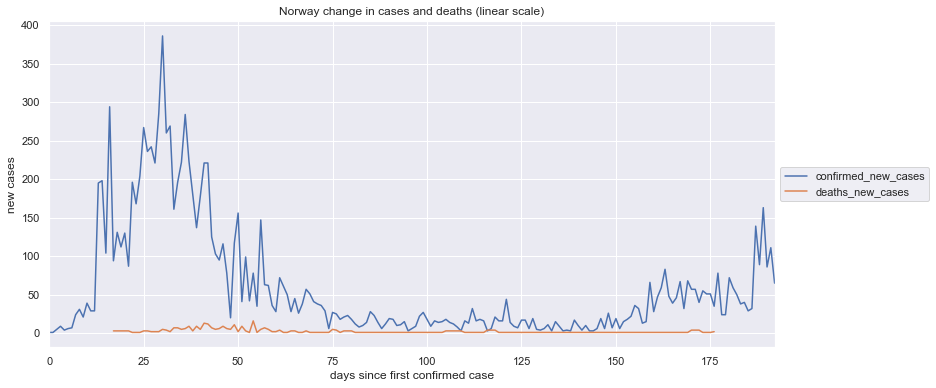

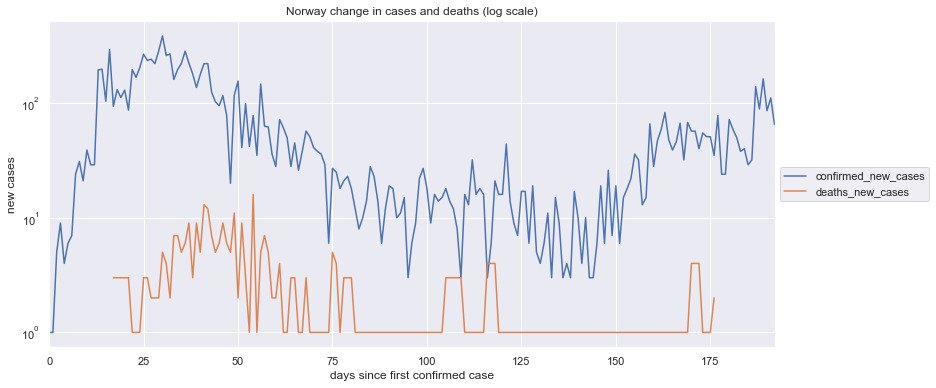

In [12]:
location_name = 'Norway'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Austria

confirmed  deaths  recovered  confirmed_percentage_change  \
189      27642     734      23565                     0.743494   
190      27969     734      23820                     1.182982   
191      28372     735      24171                     1.440881   
192      28729     735      24513                     1.258283   
193      29087     735      24828                     1.246128   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
189                                        4885.488815                 
190                                        7773.356715                 
191                                        9468.003611                 
192                                        8268.154296                 
193                                        8188.282639                 

     deaths_percentage_change  \
189                  0.136426   
190                  0.136426   
191                  0.136240   
192                       NaN   
193                       NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
189                                         896.450540           
190                                         896.450540           
191                                         895.229217           
192                                                NaN           
193                                                NaN           

     confirmed_new_cases  deaths_new_cases  
189                204.0               1.0  
190                327.0               1.0  
191                403.0               1.0  
192                357.0               NaN  
193                358.0               NaN

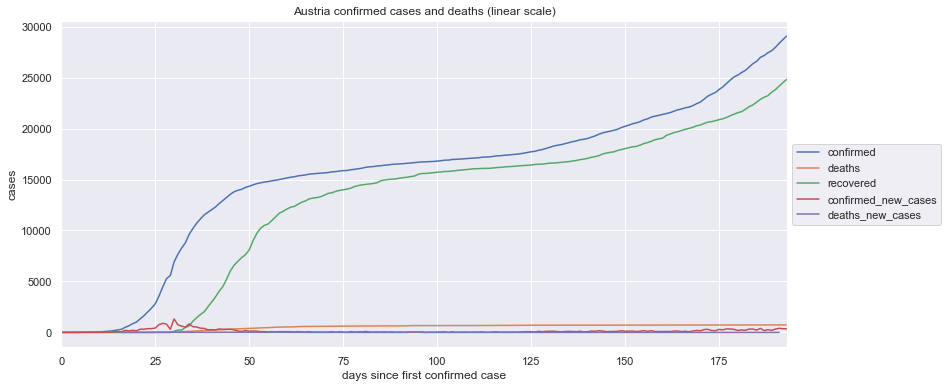

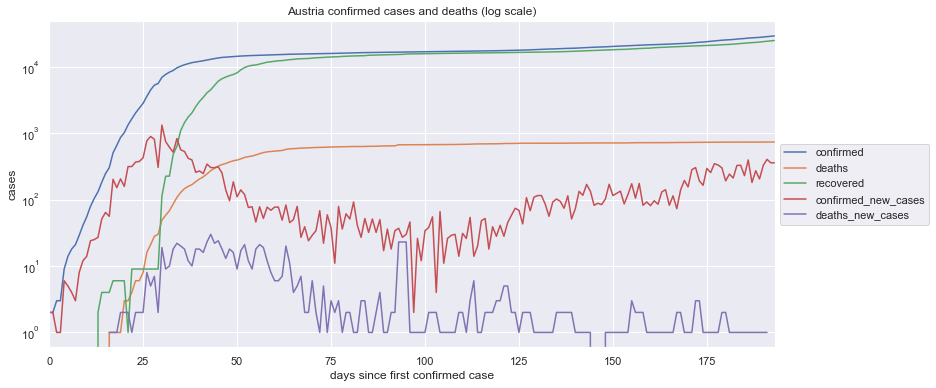

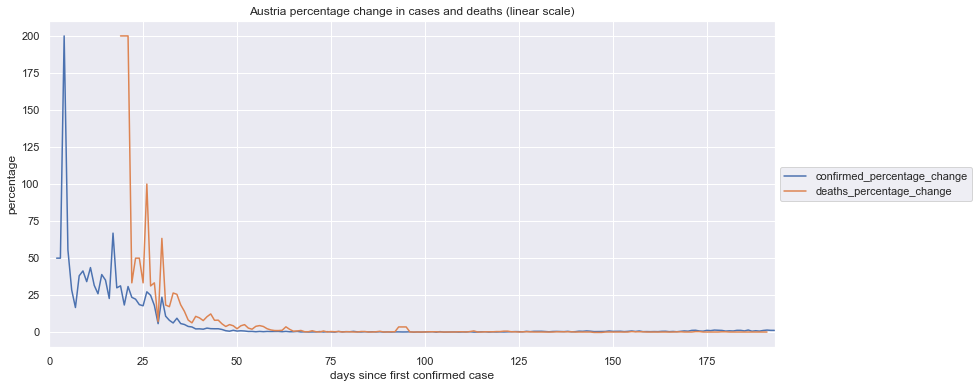

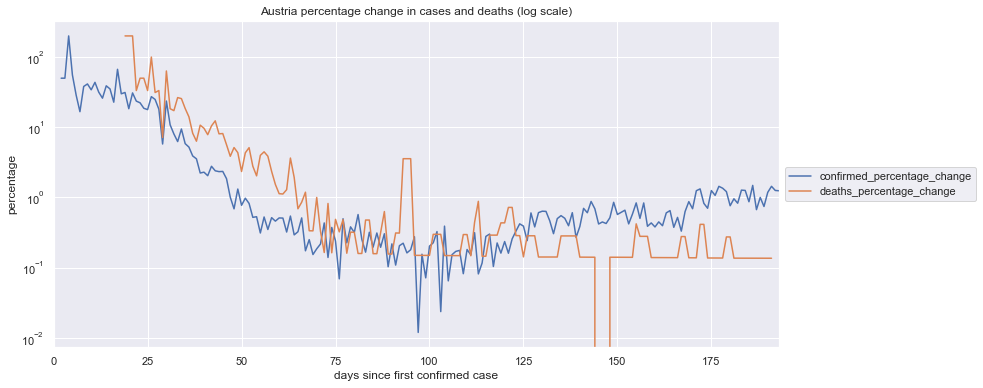

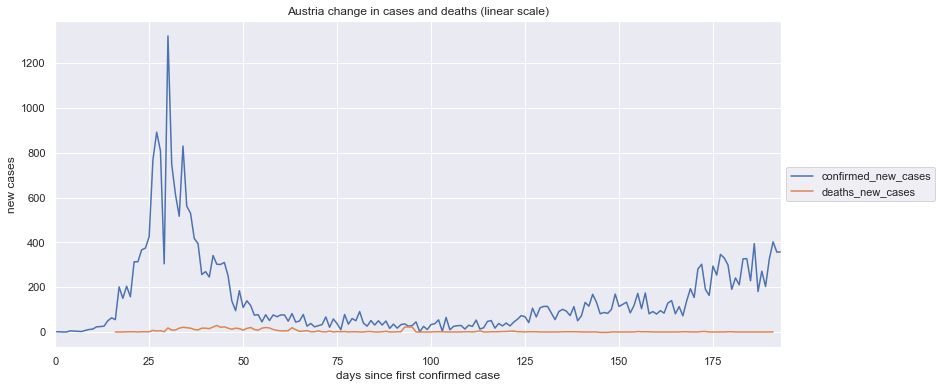

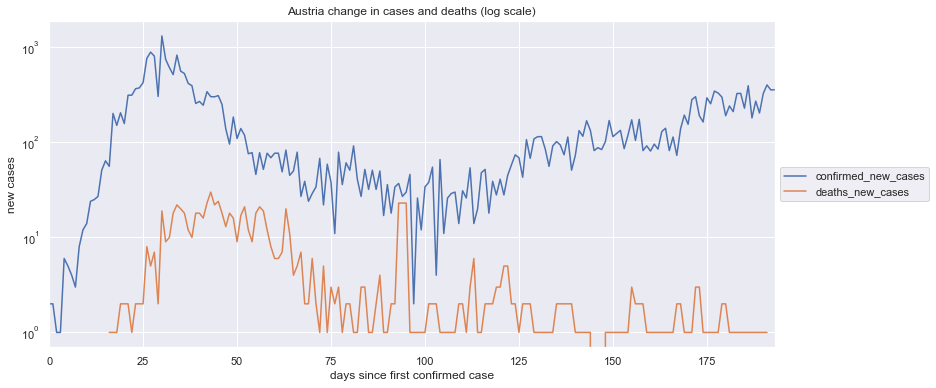

In [13]:
location_name = 'Austria'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Sweden

confirmed  deaths recovered  confirmed_percentage_change  \
213      84521    5813       NaN                     0.168288   
214      84532    5820       NaN                     0.013015   
215      84729    5832       NaN                     0.233048   
216      84985    5835       NaN                     0.302140   
217      84985    5835       NaN                          NaN   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
213                                        3030.585487                 
214                                         234.369248                 
215                                        4196.793984                 
216                                        5441.021643                 
217                                                NaN                 

     deaths_percentage_change  \
213                  0.086088   
214                  0.120420   
215                  0.206186   
216                  0.051440   
217                       NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
213                                        1550.300780           
214                                        2168.554224           
215                                        3713.050280           
216                                         926.352565           
217                                                NaN           

     confirmed_new_cases  deaths_new_cases  
213                142.0               5.0  
214                 11.0               7.0  
215                197.0              12.0  
216                256.0               3.0  
217                  NaN               NaN

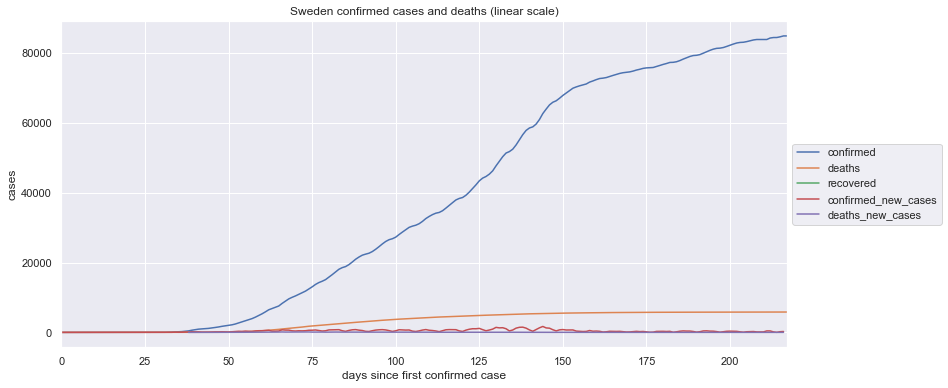

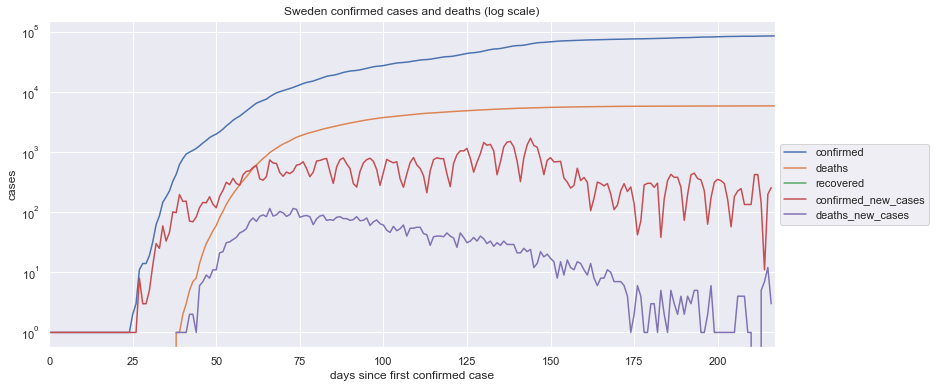

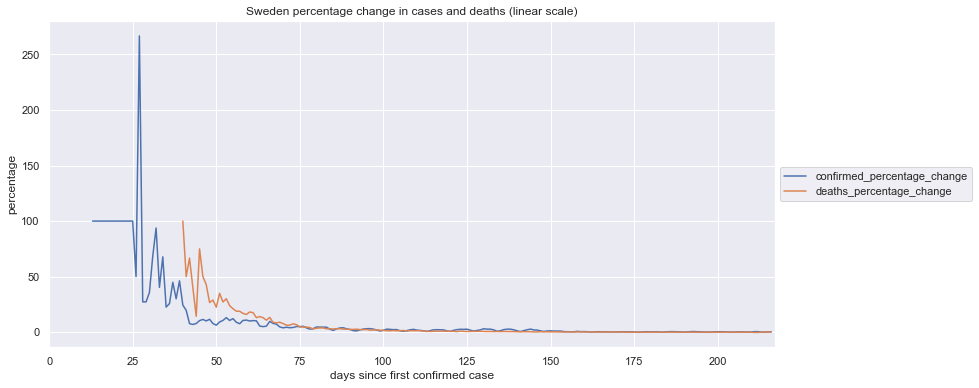

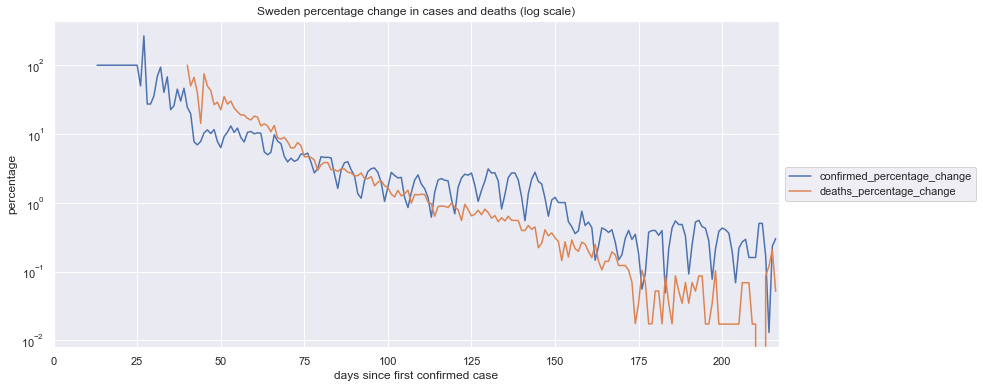

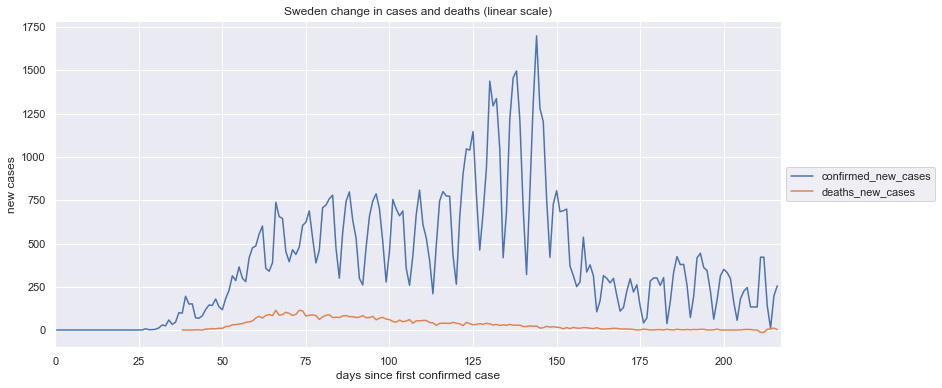

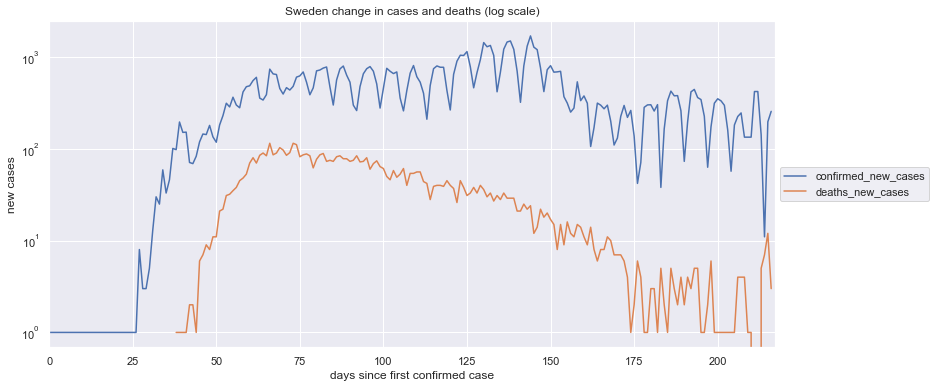

In [14]:
location_name = 'Sweden'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Ireland

confirmed  deaths recovered  confirmed_percentage_change  \
185      29025    1777       NaN                     0.742772   
186      29114    1777       NaN                     0.306632   
187      29206    1777       NaN                     0.315999   
188      29303    1777       NaN                     0.332124   
189      29534    1777       NaN                     0.788315   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
185                                        5977.593353                 
186                                        2467.679224                 
187                                        2543.061576                 
188                                        2672.825339                 
189                                        6344.111704                 

     deaths_percentage_change  \
185                       NaN   
186                       NaN   
187                       NaN   
188                       NaN   
189                       NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
185                                                NaN           
186                                                NaN           
187                                                NaN           
188                                                NaN           
189                                                NaN           

     confirmed_new_cases  deaths_new_cases  
185                214.0               NaN  
186                 89.0               NaN  
187                 92.0               NaN  
188                 97.0               NaN  
189                231.0               NaN

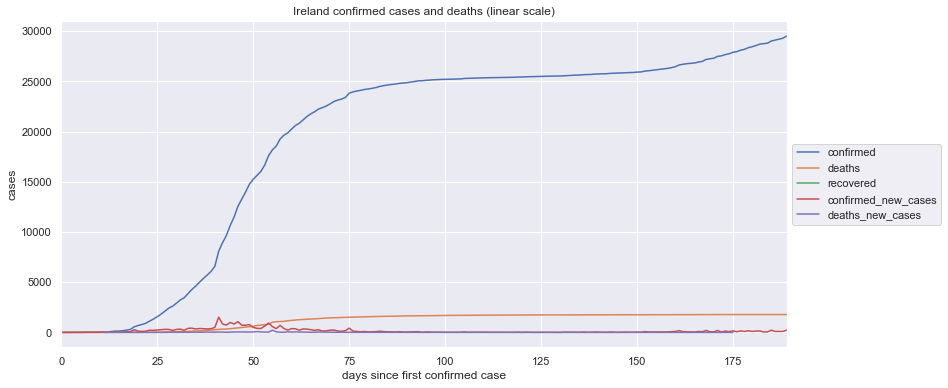

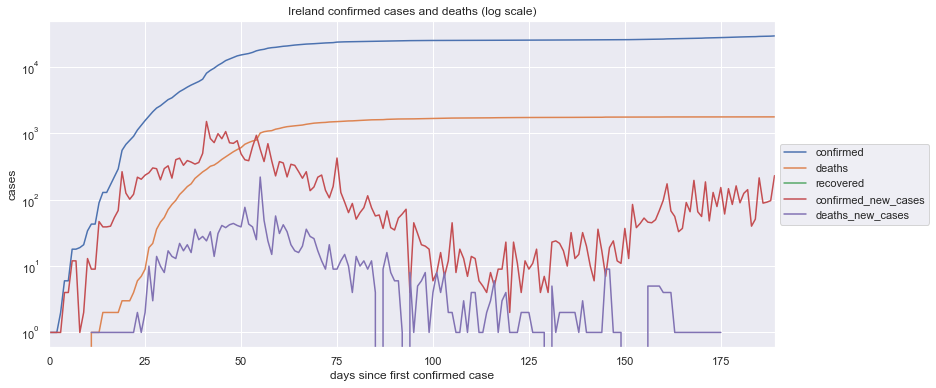

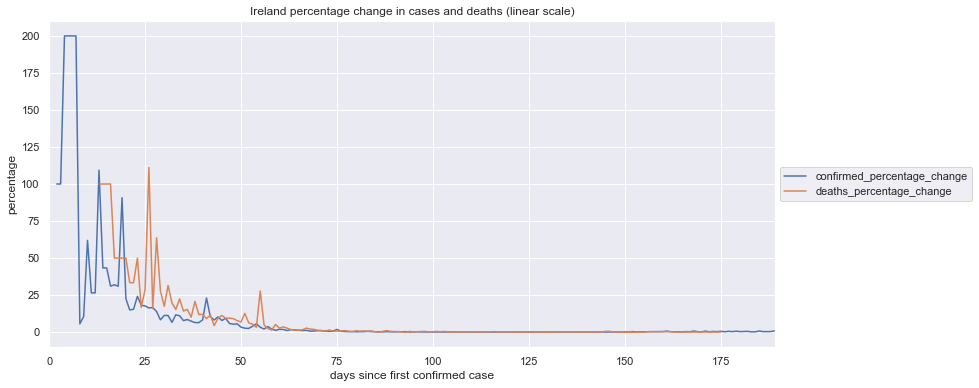

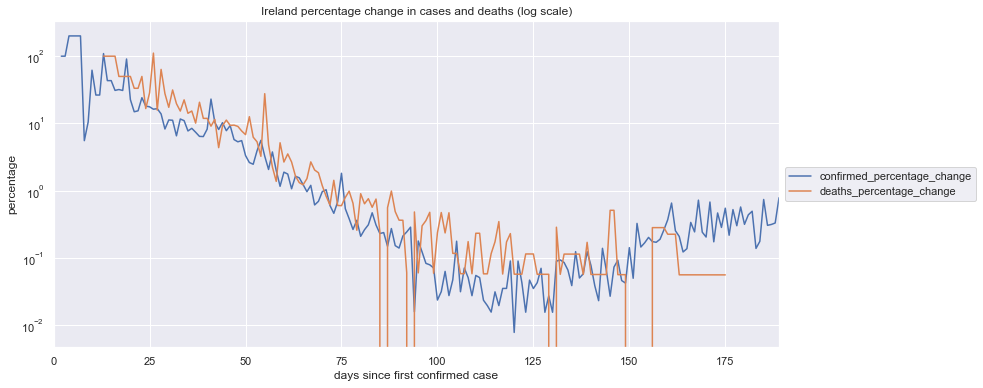

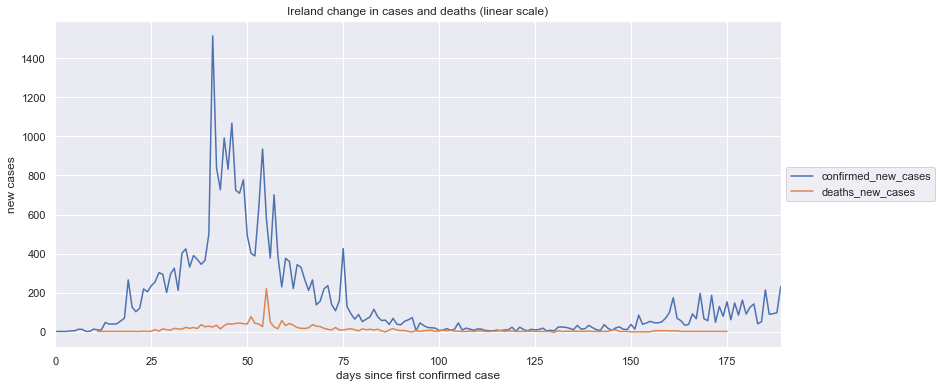

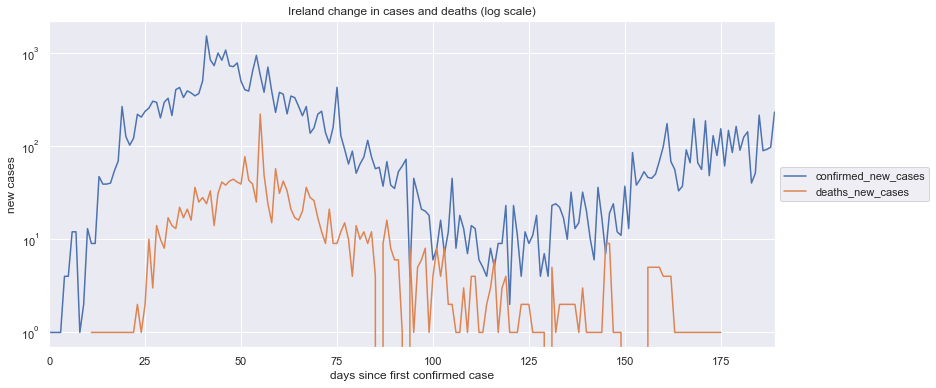

In [15]:
location_name = 'Ireland'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# United Kingdom (approximate)

confirmed  deaths recovered  confirmed_percentage_change  \
214     337168   41504       NaN                     0.385562   
215     338676   41514       NaN                     0.447255   
216     340411   41527       NaN                     0.512289   
217     342351   41537       NaN                     0.569899   
218     344164   41549       NaN                     0.529573   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
214                                       33295.410165                 
215                                       38622.882778                 
216                                       44238.943995                 
217                                       49213.906389                 
218                                       45731.547498                 

     deaths_percentage_change  \
214                  0.007229   
215                  0.024094   
216                  0.031315   
217                  0.024081   
218                  0.028890   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
214                                         624.241141           
215                                        2080.653397           
216                                        2704.197865           
217                                        2079.501014           
218                                        2494.800451           

     confirmed_new_cases  deaths_new_cases  
214               1295.0               3.0  
215               1508.0              10.0  
216               1735.0              13.0  
217               1940.0              10.0  
218               1813.0              12.0

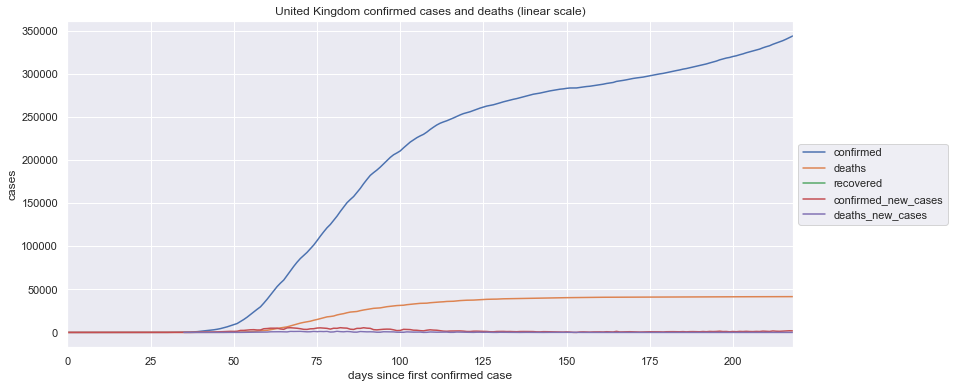

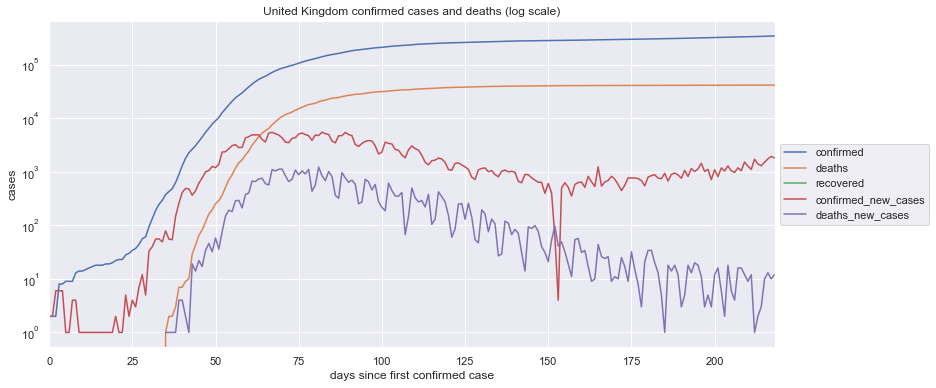

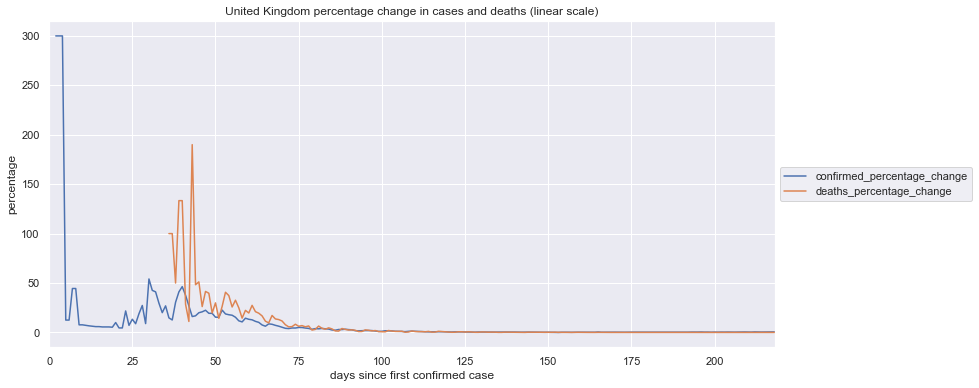

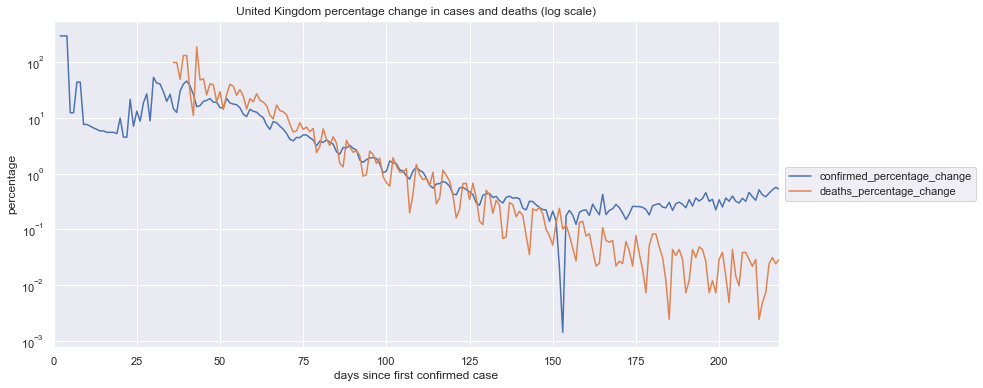

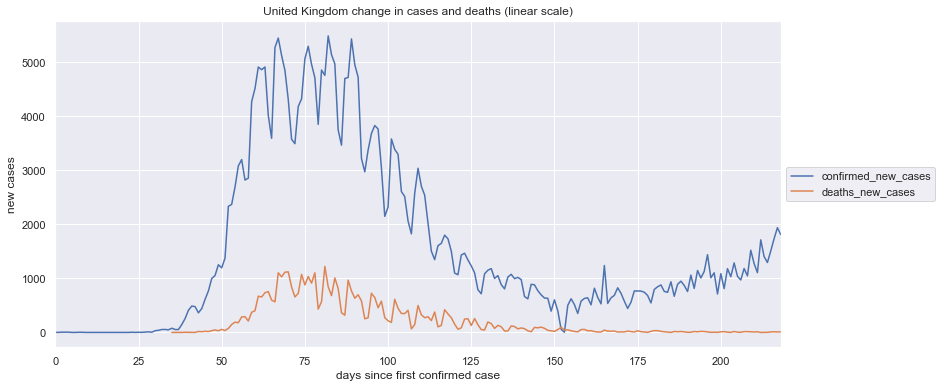

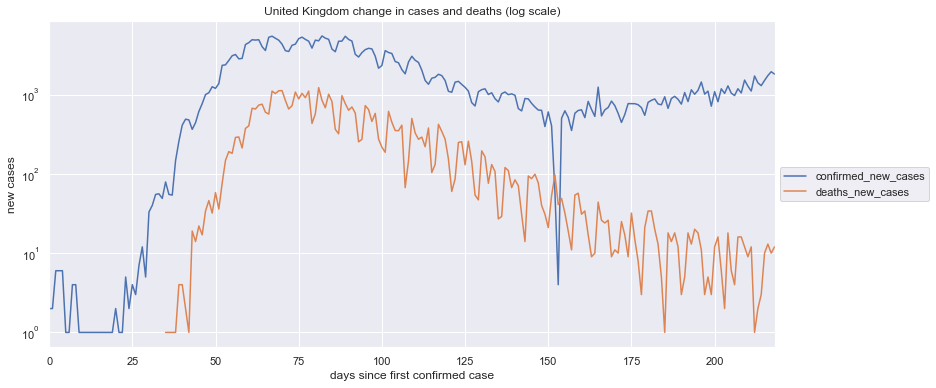

In [16]:
location_name = 'United Kingdom'
#location = df.query('country == @location_name')
location = df.query('country in ["United Kingdom"] and province == ""')
location = process(location)
locations[location_name] = location

# Germany

confirmed  deaths recovered  confirmed_percentage_change  \
218     246015    9307       NaN                     0.495502   
219     247411    9322       NaN                     0.567445   
220     248840    9322       NaN                     0.577581   
221     250283    9327       NaN                     0.579891   
222     251058    9329       NaN                     0.309649   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
218                                       32776.706104                 
219                                       37535.594467                 
220                                       38206.098577                 
221                                       38358.852441                 
222                                       20482.823291                 

     deaths_percentage_change  \
218                  0.042997   
219                  0.161169   
220                  0.161169   
221                  0.053637   
222                  0.021443   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
218                                        2844.175808           
219                                       10661.075351           
220                                       10661.075351           
221                                        3547.973550           
222                                        1418.428624           

     confirmed_new_cases  deaths_new_cases  
218               1213.0               4.0  
219               1396.0              15.0  
220               1429.0              15.0  
221               1443.0               5.0  
222                775.0               2.0

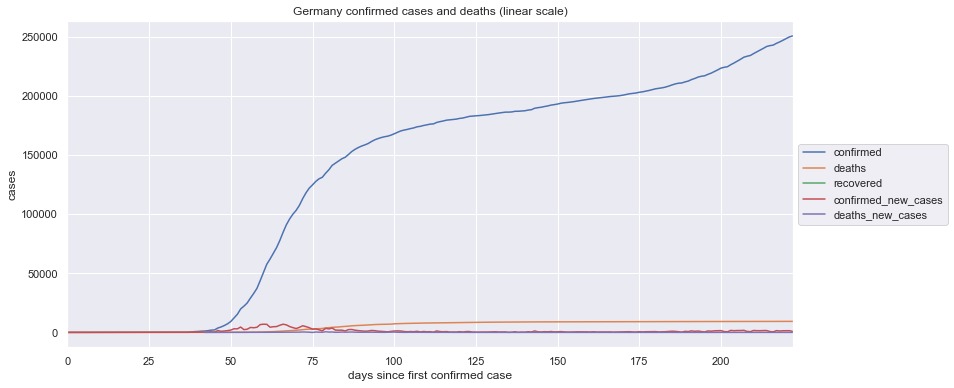

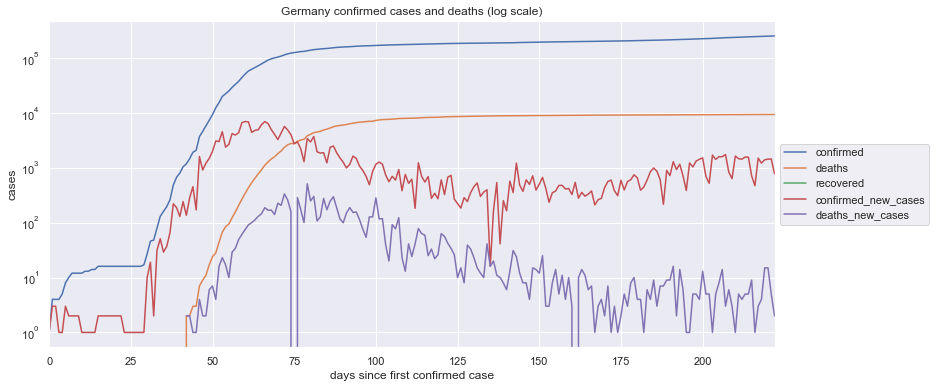

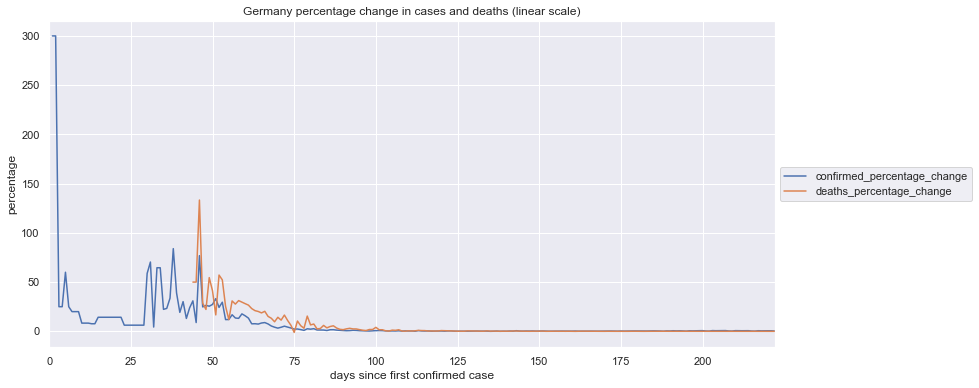

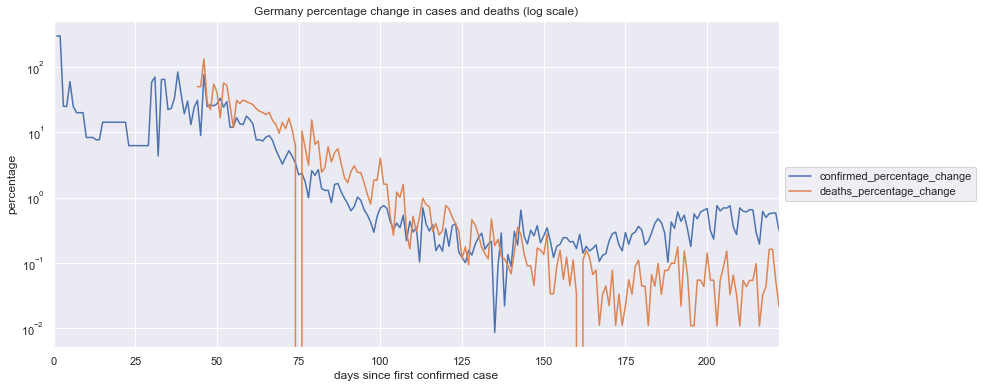

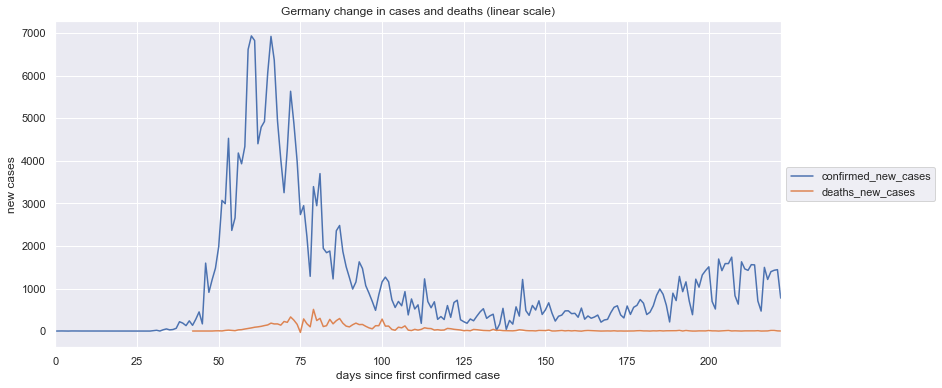

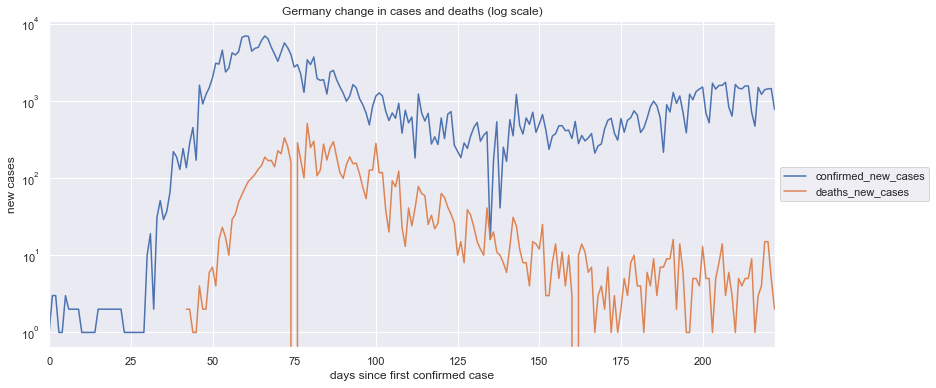

In [17]:
location_name = 'Germany'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Italy

confirmed  deaths recovered  confirmed_percentage_change  \
214     270189   35491       NaN                     0.362165   
215     271515   35497       NaN                     0.490768   
216     272912   35507       NaN                     0.514520   
217     274644   35518       NaN                     0.634637   
218     276338   35534       NaN                     0.616798   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
214                                       29400.782170                 
215                                       39840.774246                 
216                                       41769.039470                 
217                                       51520.155498                 
218                                       50072.030133                 

     deaths_percentage_change  \
214                  0.022546   
215                  0.016906   
216                  0.028171   
217                  0.030980   
218                  0.045048   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
214                                        1830.296989           
215                                        1372.413318           
216                                        2286.968901           
217                                        2514.957293           
218                                        3656.986771           

     confirmed_new_cases  deaths_new_cases  
214                975.0               8.0  
215               1326.0               6.0  
216               1397.0              10.0  
217               1732.0              11.0  
218               1694.0              16.0

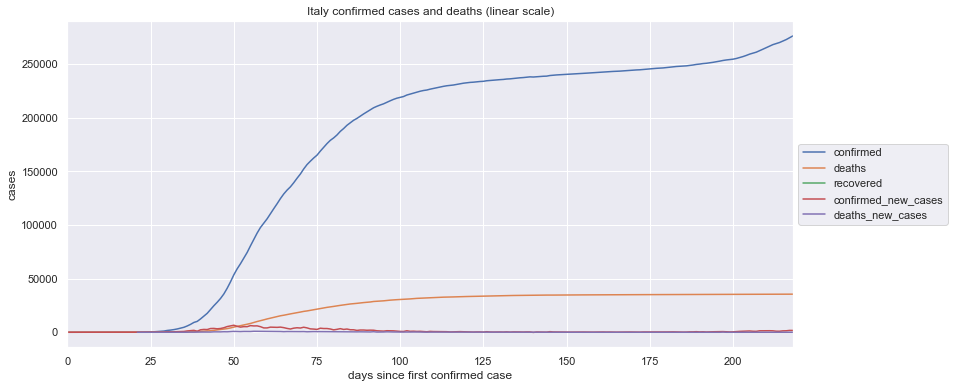

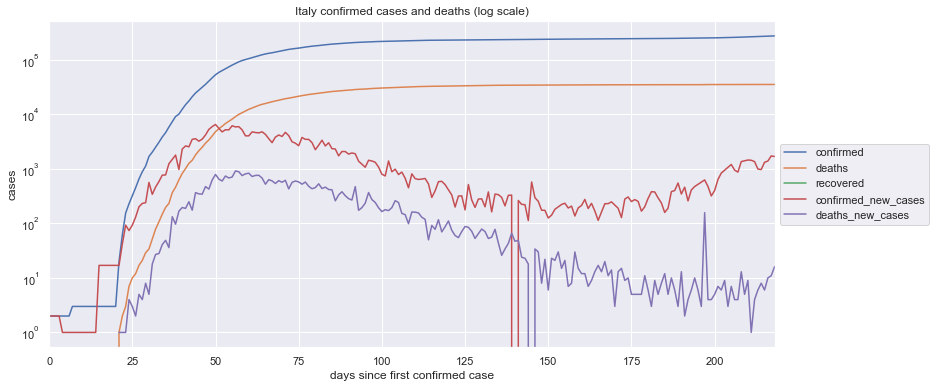

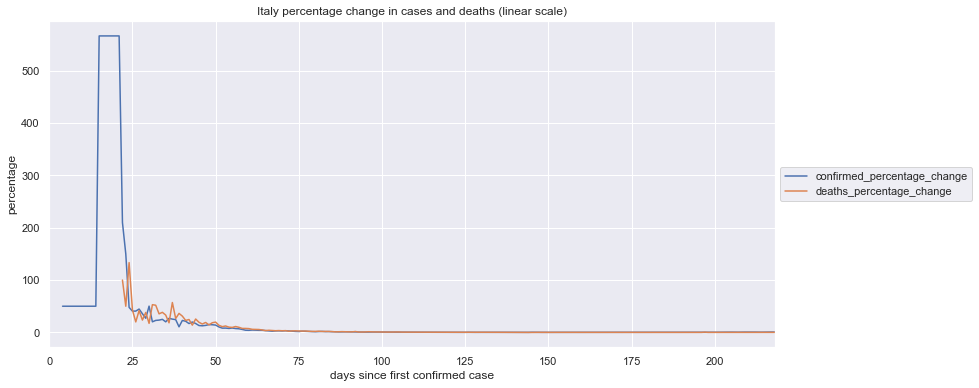

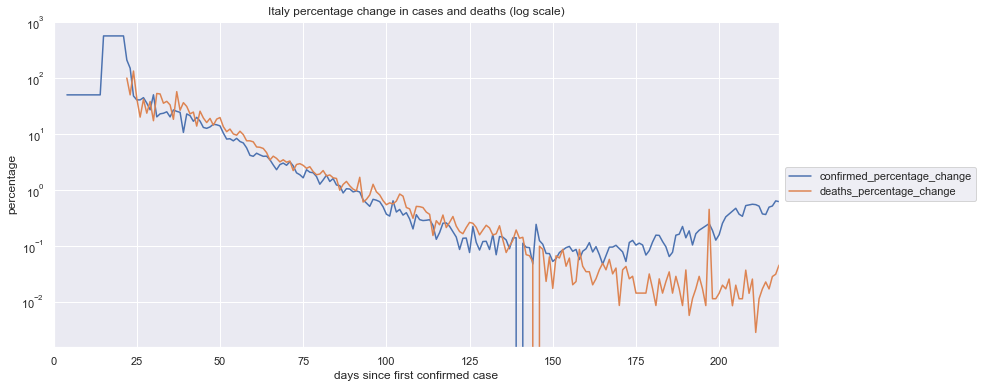

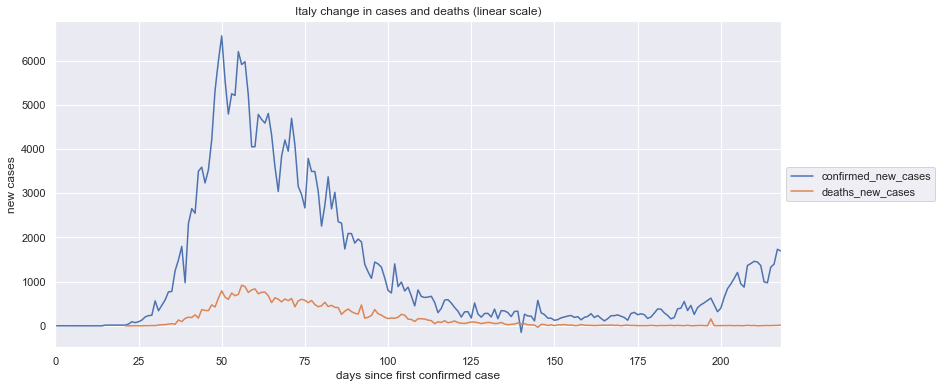

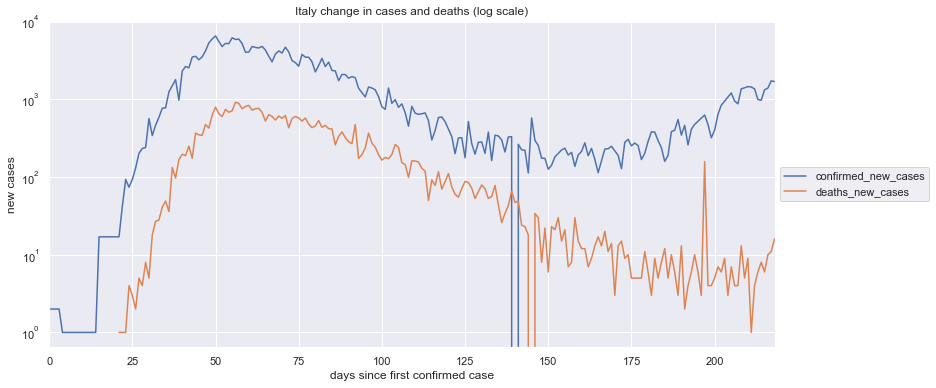

In [18]:
location_name = 'Italy'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# United States of America

confirmed  deaths recovered  confirmed_percentage_change  \
223    6073840  184664       NaN                     0.717227   
224    6113510  185720       NaN                     0.653129   
225    6150016  186790       NaN                     0.597137   
226    6200518  187755       NaN                     0.821169   
227    6244970  188538       NaN                     0.716908   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
223                                      690983.020853                 
224                                      629230.232487                 
225                                      575286.721959                 
226                                      791121.267485                 
227                                      690675.516062                 

     deaths_percentage_change  \
223                  0.581164   
224                  0.571849   
225                  0.576136   
226                  0.516623   
227                  0.417033   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
223                                      559898.838683           
224                                      550924.907485           
225                                      555054.758803           
226                                      497719.228208           
227                                      401773.213388           

     confirmed_new_cases  deaths_new_cases  
223              43253.0            1067.0  
224              39670.0            1056.0  
225              36506.0            1070.0  
226              50502.0             965.0  
227              44452.0             783.0

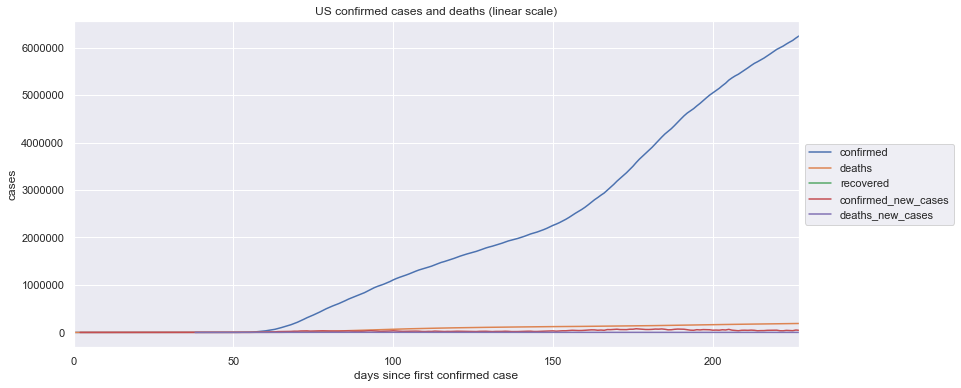

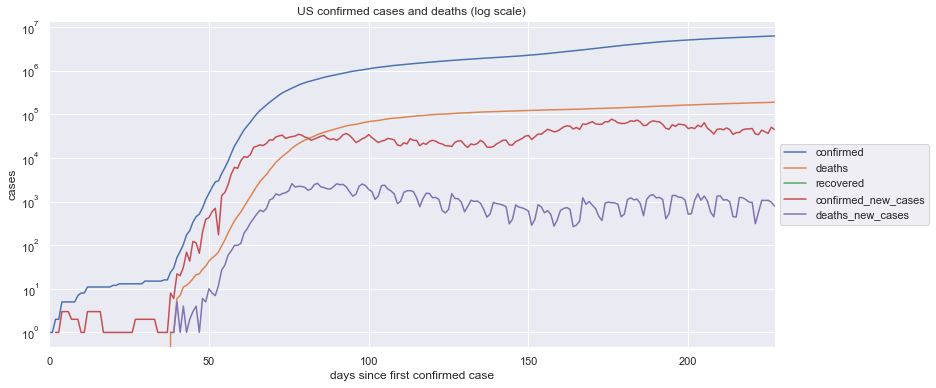

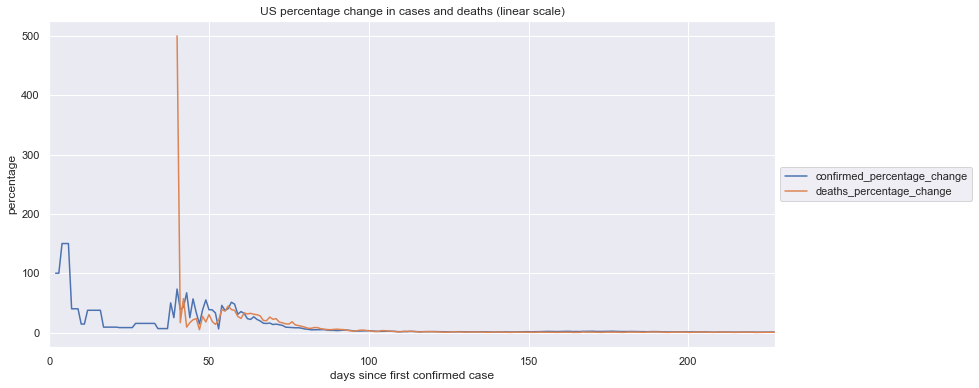

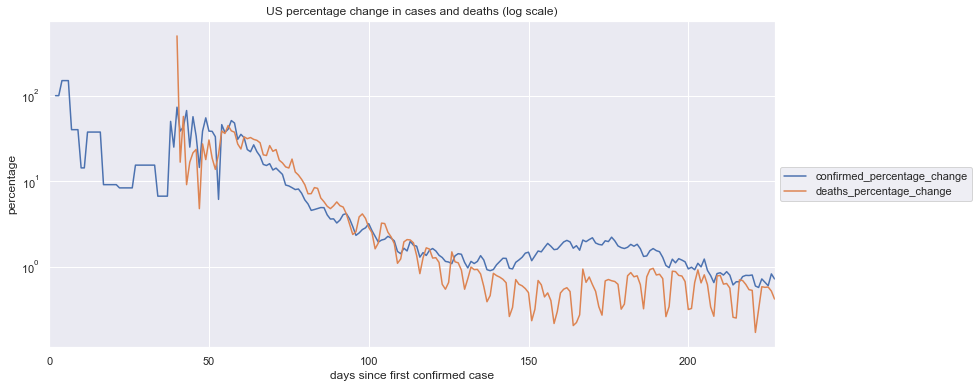

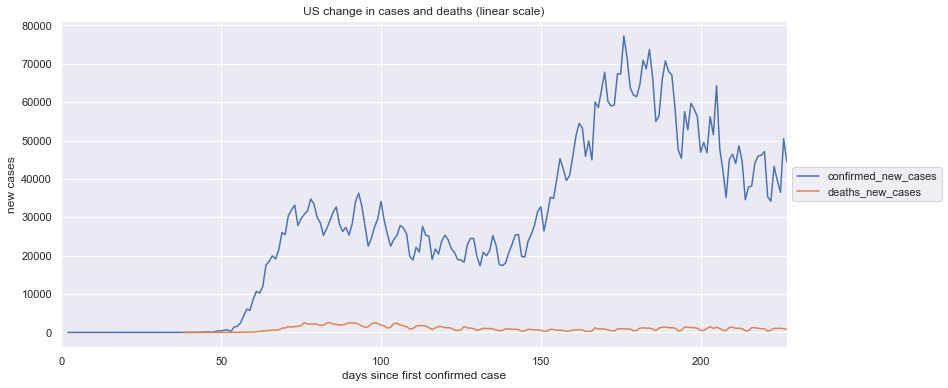

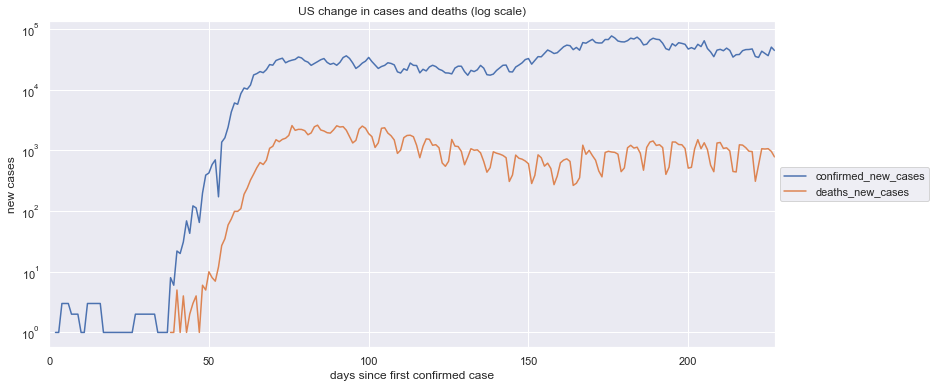

In [19]:
location_name = 'US'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Mongolia

confirmed  deaths recovered  confirmed_percentage_change  \
175        306       0       NaN                     0.657895   
176        306       0       NaN                     0.657895   
177        310       0       NaN                     1.307190   
178        310       0       NaN                          NaN   
179        310       0       NaN                          NaN   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
175                                          41.708506                 
176                                          41.708506                 
177                                          82.871804                 
178                                                NaN                 
179                                                NaN                 

     deaths_percentage_change  \
175                       NaN   
176                       NaN   
177                       NaN   
178                       NaN   
179                       NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
175                                                NaN           
176                                                NaN           
177                                                NaN           
178                                                NaN           
179                                                NaN           

     confirmed_new_cases  deaths_new_cases  
175                  2.0               NaN  
176                  2.0               NaN  
177                  4.0               NaN  
178                  NaN               NaN  
179                  NaN               NaN

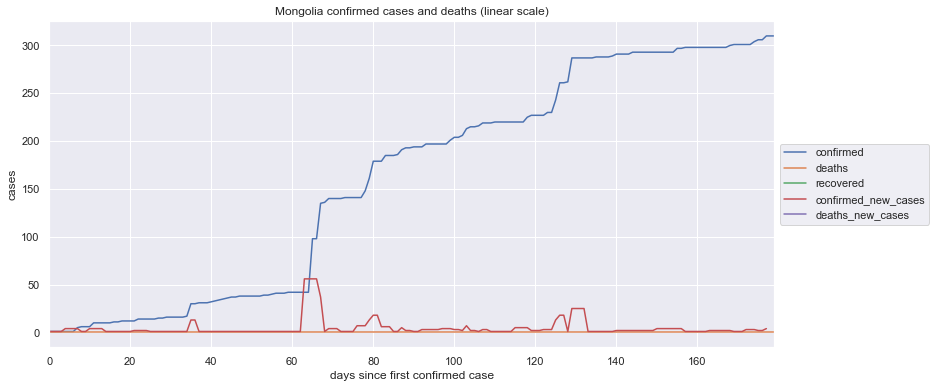

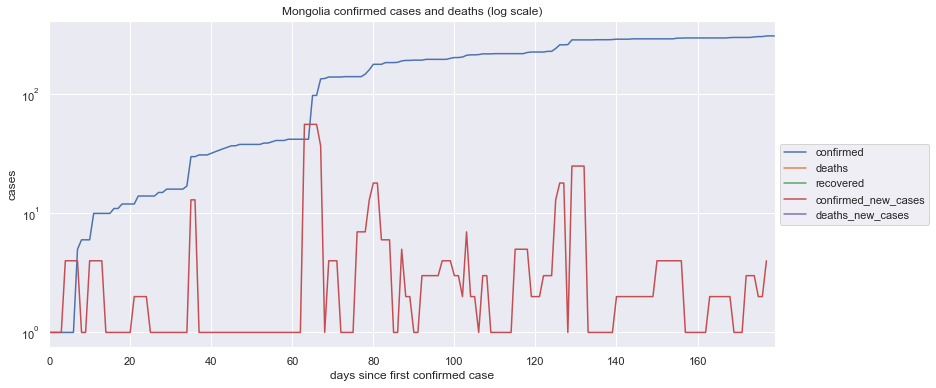

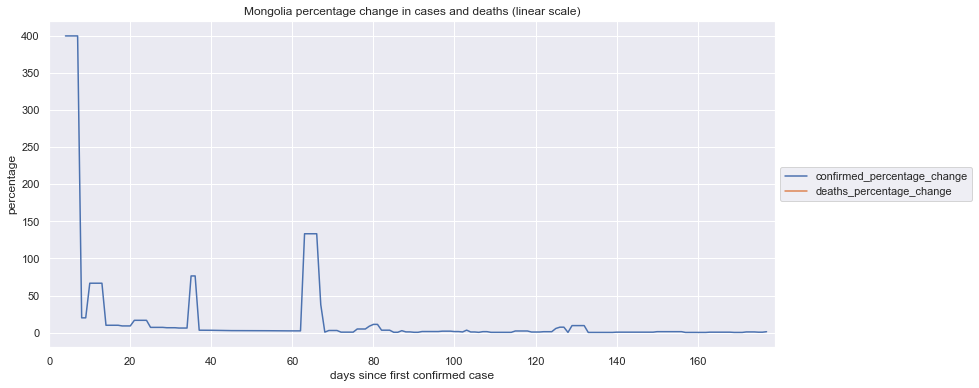

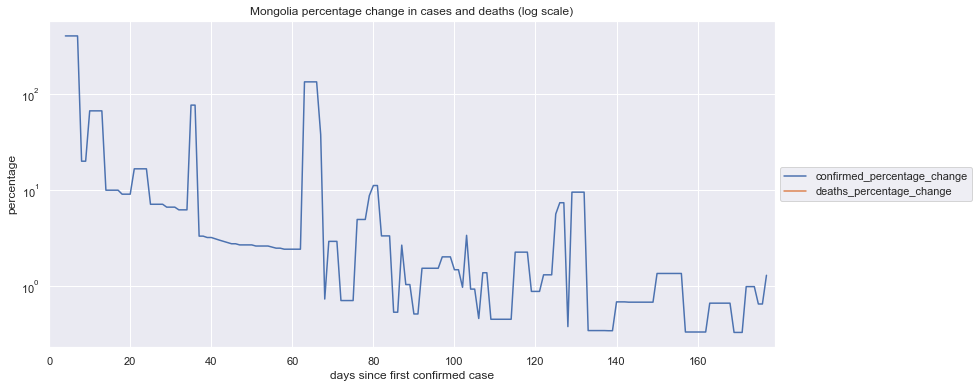

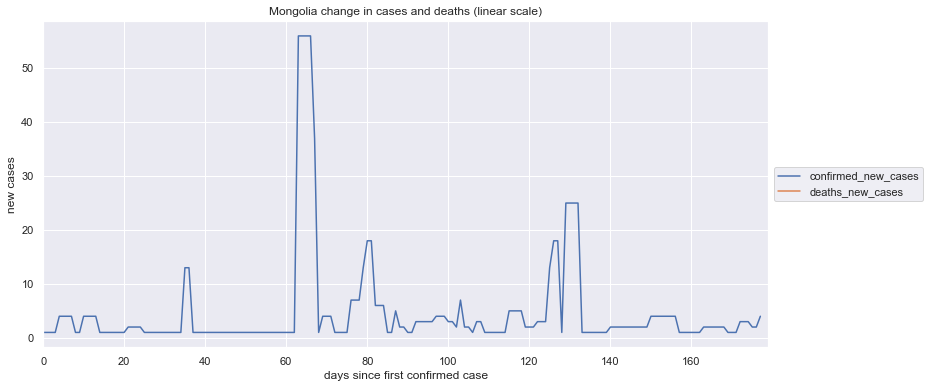

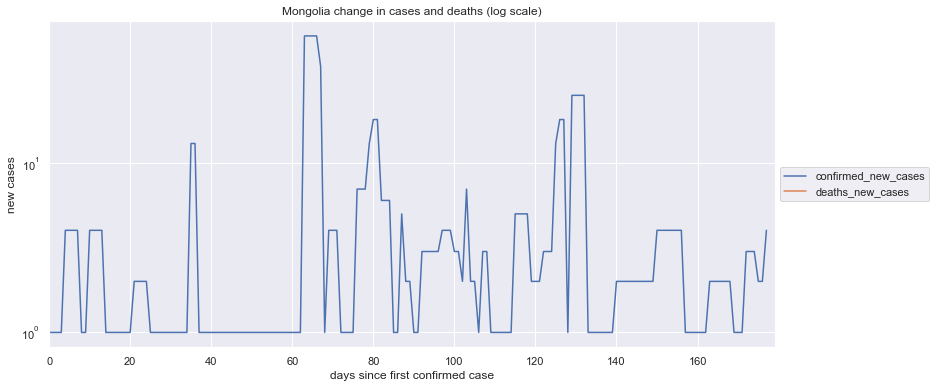

In [20]:
location_name = 'Mongolia'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# South Africa

confirmed  deaths recovered  confirmed_percentage_change  \
180     628259   14263       NaN                     0.194246   
181     630595   14389       NaN                     0.371821   
182     633015   14563       NaN                     0.383765   
183     635078   14678       NaN                     0.325901   
184     636884   14779       NaN                     0.284375   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
180                                       14564.761093                 
181                                       27879.574127                 
182                                       28775.101140                 
183                                       24436.400953                 
184                                       21322.724382                 

     deaths_percentage_change  \
180                  0.805711   
181                  0.883405   
182                  1.209257   
183                  0.789672   
184                  0.688105   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
180                                       60413.099866           
181                                       66238.681425           
182                                       90671.468885           
183                                       59210.537911           
184                                       51594.868051           

     confirmed_new_cases  deaths_new_cases  
180               1218.0             114.0  
181               2336.0             126.0  
182               2420.0             174.0  
183               2063.0             115.0  
184               1806.0             101.0

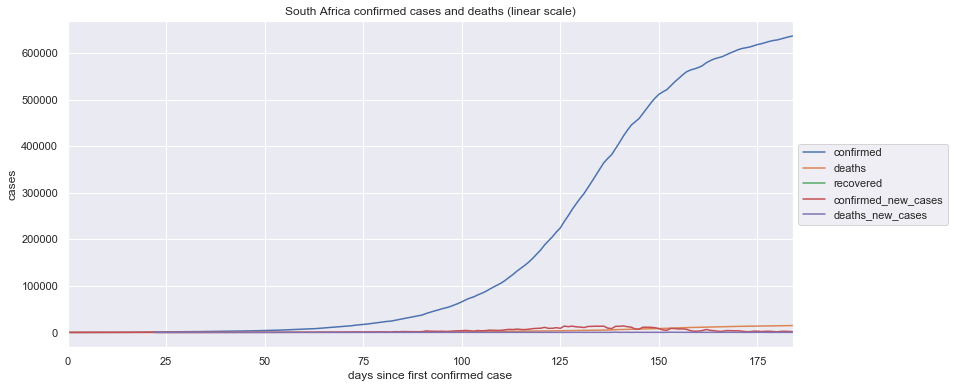

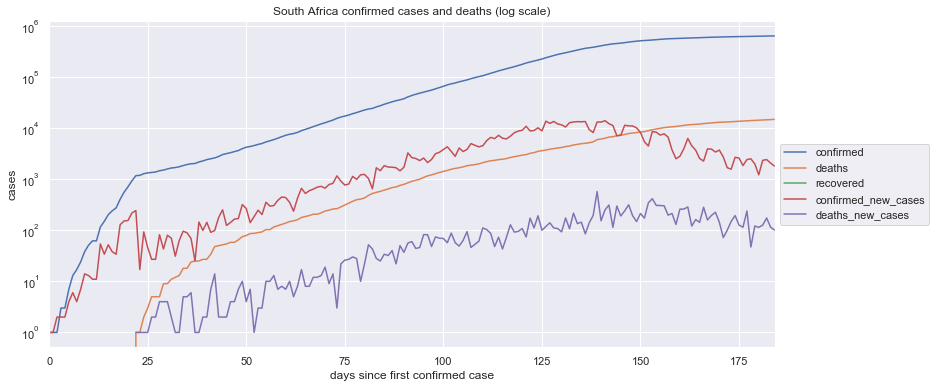

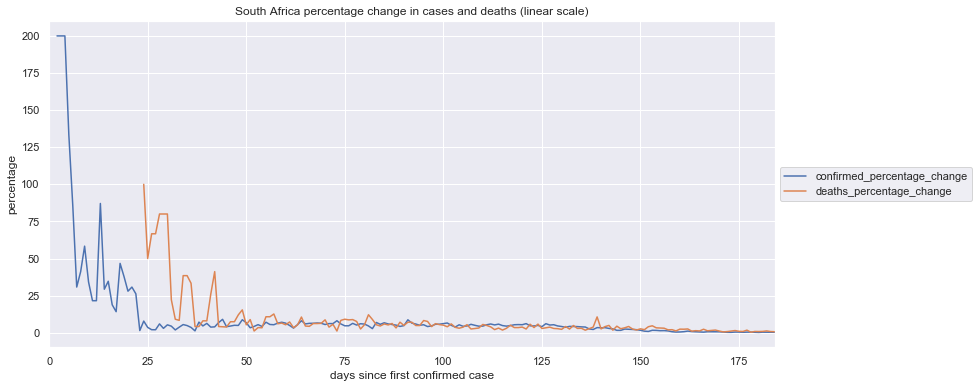

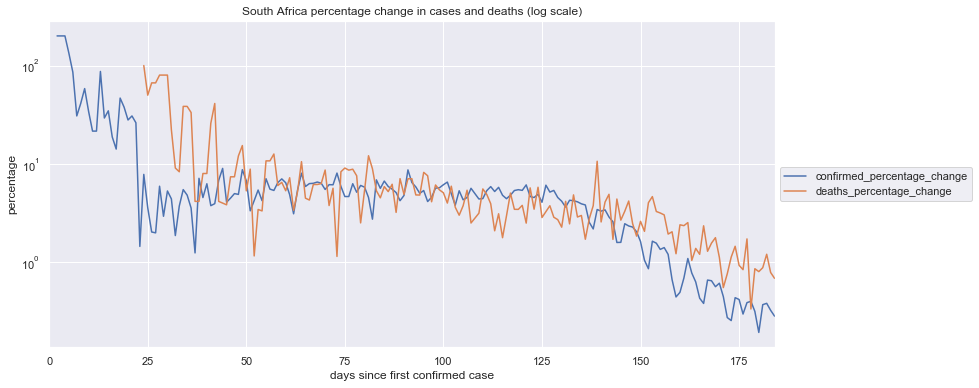

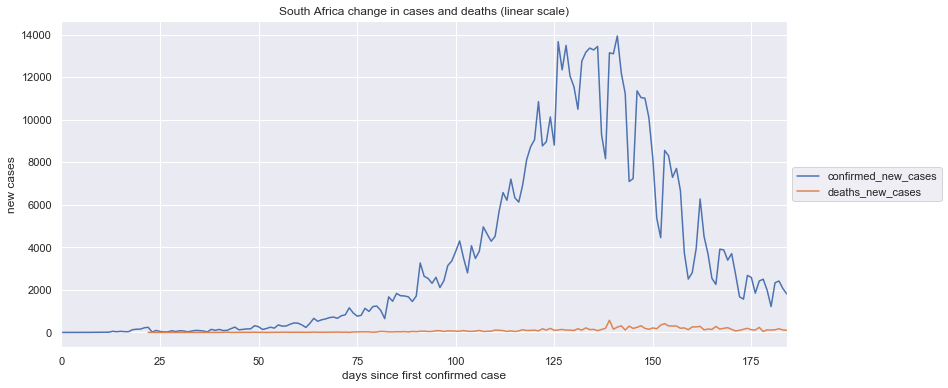

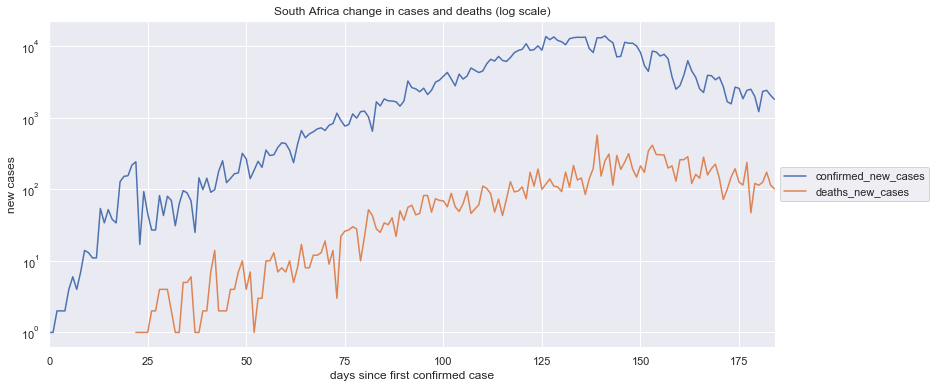

In [21]:
location_name = 'South Africa'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

---

In [22]:
South_Korea              = locations['Korea, South']
Greece                   = locations['Greece']
Belgium                  = locations['Belgium']
Norway                   = locations['Norway']
Austria                  = locations['Austria']
Sweden                   = locations['Sweden']
Ireland                  = locations['Ireland']
United_Kingdom           = locations['United Kingdom']
Germany                  = locations['Germany']
Italy                    = locations['Italy']
United_States_of_America = locations['US']
Switzerland              = locations['Switzerland']
Mongolia                 = locations['Mongolia']
South_Africa             = locations['South Africa']

locations_list           = [South_Korea,
                            Belgium,
                            Greece,
                            Norway,
                            Austria,
                            Sweden,
                            Ireland,
                            United_Kingdom,
                            Germany,
                            Italy,
                            United_States_of_America,
                            Switzerland,
                            Mongolia,
                            South_Africa]

In [23]:
#South_Korea

In [24]:
_df = pd.merge( South_Korea.add_suffix('_South_Korea'), Sweden.add_suffix('_Sweden'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Ireland.add_suffix('_Ireland'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                     United_Kingdom.add_suffix('_United_Kingdom'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Germany.add_suffix('_Germany'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                       Italy.add_suffix('_Italy'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df, United_States_of_America.add_suffix('_United_States_of_America'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                     Greece.add_suffix('_Greece'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                     Norway.add_suffix('_Norway'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Austria.add_suffix('_Austria'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Belgium.add_suffix('_Belgium'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                           Switzerland.add_suffix('_Switzerland'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                 Mongolia.add_suffix('_Mongolia'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                         South_Africa.add_suffix('_South_Africa'), how='outer', left_index=True, right_index=True)
_df.tail()

confirmed_South_Korea  deaths_South_Korea recovered_South_Korea  \
223                  20449                 326                   NaN   
224                  20644                 329                   NaN   
225                  20842                 331                   NaN   
226                  21010                 333                   NaN   
227                  21177                 334                   NaN   

     confirmed_percentage_change_South_Korea  \
223                                 1.322961   
224                                 0.953592   
225                                 0.959116   
226                                 0.806065   
227                                 0.794860   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor_South_Korea  \
223                                        6714.227536                             
224                                        4839.622997                             
225                                        4867.661115                             
226                                        4090.900207                             
227                                        4034.032697                             

     deaths_percentage_change_South_Korea  \
223                              0.617284   
224                              0.920245   
225                              0.607903   
226                              0.604230   
227                              0.300300   

     deaths_percentage_change_by_half_mean_deaths_cases_factor_South_Korea  \
223                                        3132.809454                       
224                                        4670.384646                       
225                                        3085.198368                       
226                                        3066.556686                       
227                                        1524.069464                       

     confirmed_new_cases_South_Korea  deaths_new_cases_South_Korea  \
223                            267.0                           2.0   
224                            195.0                           3.0   
225                            198.0                           2.0   
226                            168.0                           2.0   
227                            167.0                           1.0   

     confirmed_Sweden  deaths_Sweden recovered_Sweden  \
223               NaN            NaN              NaN   
224               NaN            NaN              NaN   
225               NaN            NaN              NaN   
226               NaN            NaN              NaN   
227               NaN            NaN              NaN   

     confirmed_percentage_change_Sweden  \
223                                 NaN   
224                                 NaN   
225                                 NaN   
226                                 NaN   
227                                 NaN   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor_Sweden  \
223                                                NaN                        
224                                                NaN                        
225                                                NaN                        
226                                                NaN                        
227                                                NaN                        

     deaths_percentage_change_Sweden  \
223                              NaN   
224                              NaN   
225                              NaN   
226                              NaN   
227                              NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor_Sweden  \
223                                                NaN                  
224                                                NaN                  
225                                                NaN                  
226    

# comparisons: confirmed cases

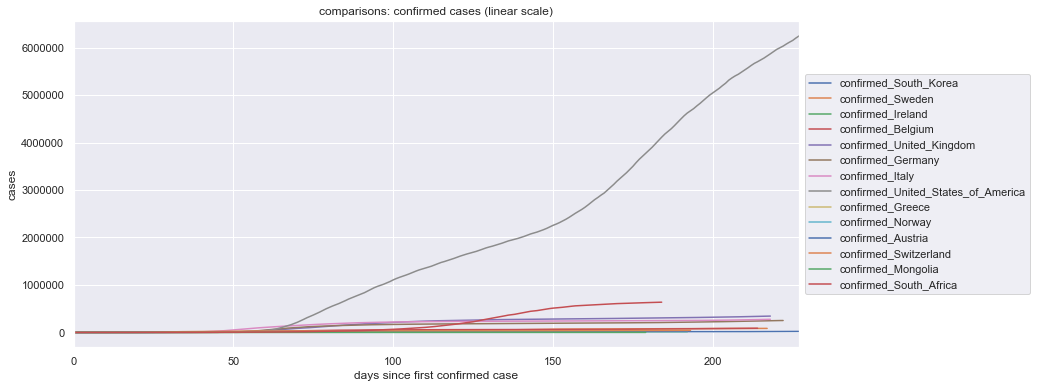

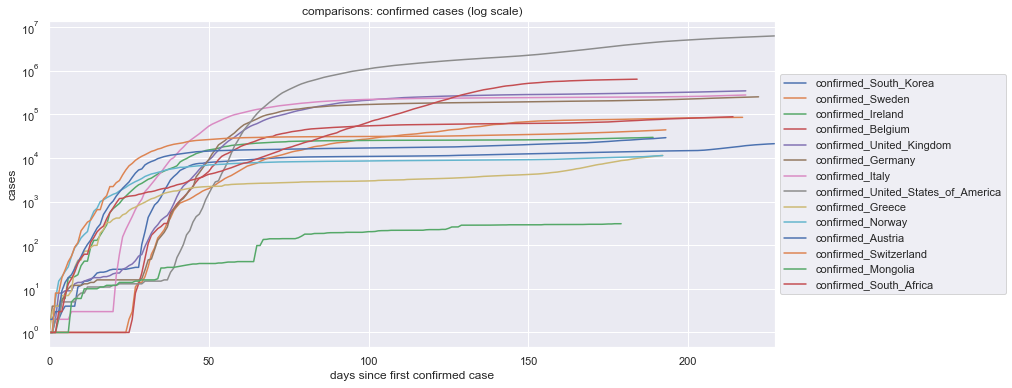

In [25]:
__df = _df[[
    'confirmed_South_Korea',
    'confirmed_Sweden',
    'confirmed_Ireland',
    'confirmed_Belgium',
    'confirmed_United_Kingdom',
    'confirmed_Germany',
    'confirmed_Italy',
    'confirmed_United_States_of_America',
    'confirmed_Greece',
    'confirmed_Norway',
    'confirmed_Austria',
    'confirmed_Switzerland',
    'confirmed_Mongolia',
    'confirmed_South_Africa']]

title = 'comparisons: confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: confirmed new cases

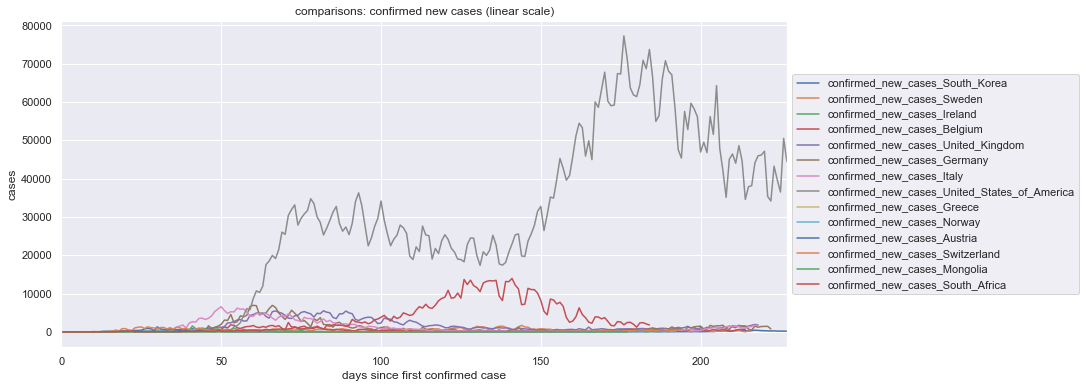

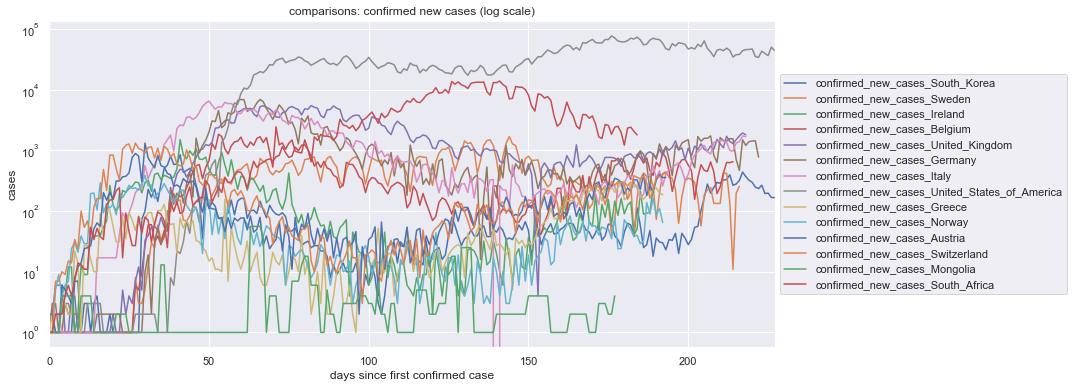

In [26]:
__df = _df[[
    'confirmed_new_cases_South_Korea',
    'confirmed_new_cases_Sweden',
    'confirmed_new_cases_Ireland',
    'confirmed_new_cases_Belgium',
    'confirmed_new_cases_United_Kingdom',
    'confirmed_new_cases_Germany',
    'confirmed_new_cases_Italy',
    'confirmed_new_cases_United_States_of_America',
    'confirmed_new_cases_Greece',
    'confirmed_new_cases_Norway',
    'confirmed_new_cases_Austria',
    'confirmed_new_cases_Switzerland',
    'confirmed_new_cases_Mongolia',
    'confirmed_new_cases_South_Africa']]

title = 'comparisons: confirmed new cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

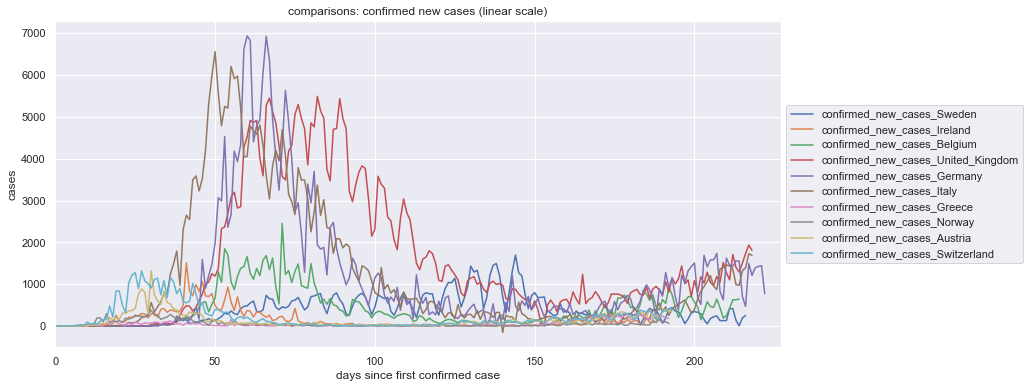

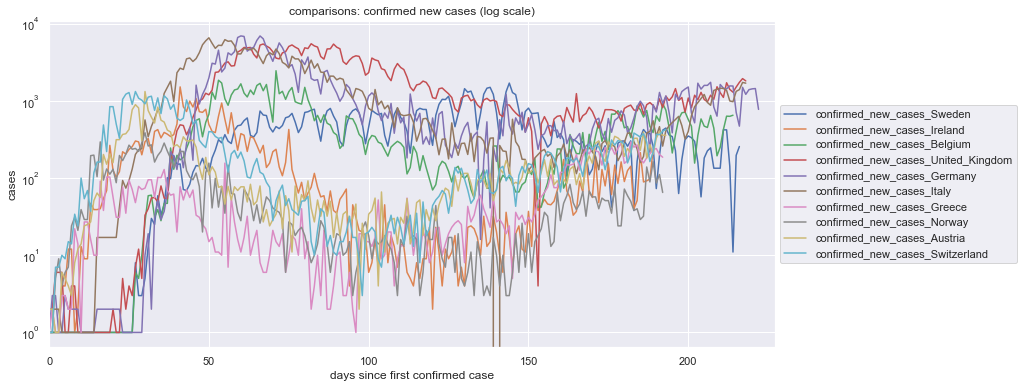

In [27]:
# European
__df = _df[[
    'confirmed_new_cases_Sweden',
    'confirmed_new_cases_Ireland',
    'confirmed_new_cases_Belgium',
    'confirmed_new_cases_United_Kingdom',
    'confirmed_new_cases_Germany',
    'confirmed_new_cases_Italy',
    'confirmed_new_cases_Greece',
    'confirmed_new_cases_Norway',
    'confirmed_new_cases_Austria',
    'confirmed_new_cases_Switzerland']]

title = 'comparisons: confirmed new cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: deaths

deaths_South_Korea  deaths_Sweden  deaths_Ireland  deaths_Belgium  \
223                 326            NaN             NaN             NaN   
224                 329            NaN             NaN             NaN   
225                 331            NaN             NaN             NaN   
226                 333            NaN             NaN             NaN   
227                 334            NaN             NaN             NaN   

     deaths_United_Kingdom  deaths_Germany  deaths_Italy  \
223                    NaN             NaN           NaN   
224                    NaN             NaN           NaN   
225                    NaN             NaN           NaN   
226                    NaN             NaN           NaN   
227                    NaN             NaN           NaN   

     deaths_United_States_of_America  deaths_Greece  deaths_Norway  \
223                           184664            NaN            NaN   
224                           185720            NaN            NaN   
225                           186790            NaN            NaN   
226                           187755            NaN            NaN   
227                           188538            NaN            NaN   

     deaths_Austria  deaths_Switzerland  deaths_Mongolia  
223             NaN                 NaN              NaN  
224             NaN                 NaN              NaN  
225             NaN                 NaN              NaN  
226             NaN                 NaN              NaN  
227             NaN                 NaN              NaN

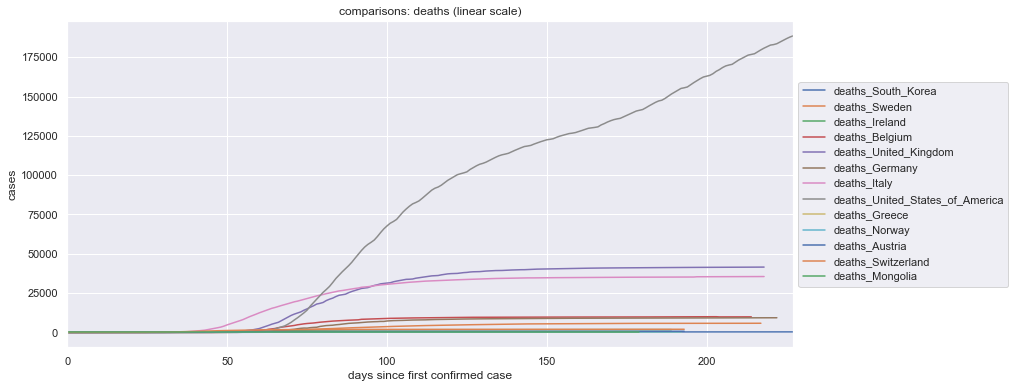

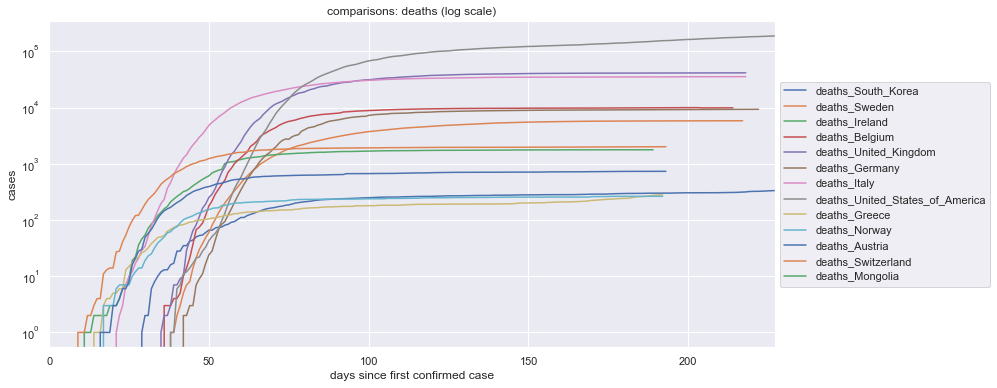

In [28]:
__df = _df[[
    'deaths_South_Korea',
    'deaths_Sweden',
    'deaths_Ireland',
    'deaths_Belgium',
    'deaths_United_Kingdom',
    'deaths_Germany',
    'deaths_Italy',
    'deaths_United_States_of_America',
    'deaths_Greece',
    'deaths_Norway',
    'deaths_Austria',
    'deaths_Switzerland',
    'deaths_Mongolia']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

deaths_Sweden  deaths_Belgium  deaths_Ireland  deaths_United_Kingdom  \
223            NaN             NaN             NaN                    NaN   
224            NaN             NaN             NaN                    NaN   
225            NaN             NaN             NaN                    NaN   
226            NaN             NaN             NaN                    NaN   
227            NaN             NaN             NaN                    NaN   

     deaths_Germany  deaths_Italy  deaths_Greece  deaths_Norway  \
223             NaN           NaN            NaN            NaN   
224             NaN           NaN            NaN            NaN   
225             NaN           NaN            NaN            NaN   
226             NaN           NaN            NaN            NaN   
227             NaN           NaN            NaN            NaN   

     deaths_Austria  deaths_Switzerland  
223             NaN                 NaN  
224             NaN                 NaN  
225             NaN                 NaN  
226             NaN                 NaN  
227             NaN                 NaN

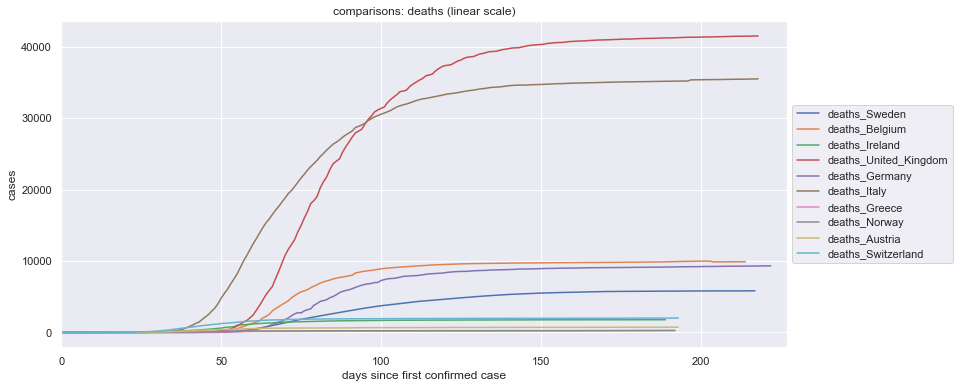

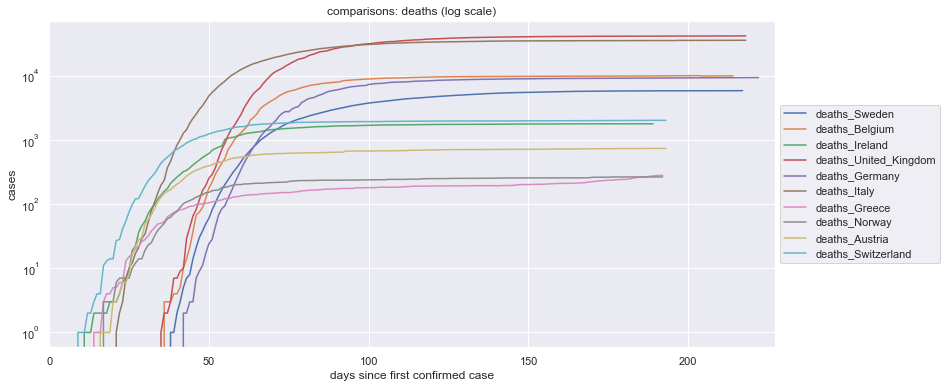

In [29]:
# some European countries
__df = _df[[
    'deaths_Sweden',
    'deaths_Belgium',
    'deaths_Ireland',
    'deaths_United_Kingdom',
    'deaths_Germany',
    'deaths_Italy',
    'deaths_Greece',
    'deaths_Norway',
    'deaths_Austria',
    'deaths_Switzerland']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: new deaths

deaths_new_cases_South_Korea  deaths_new_cases_Sweden  \
223                           2.0                      NaN   
224                           3.0                      NaN   
225                           2.0                      NaN   
226                           2.0                      NaN   
227                           1.0                      NaN   

     deaths_new_cases_Ireland  deaths_new_cases_Belgium  \
223                       NaN                       NaN   
224                       NaN                       NaN   
225                       NaN                       NaN   
226                       NaN                       NaN   
227                       NaN                       NaN   

     deaths_new_cases_United_Kingdom  deaths_new_cases_Germany  \
223                              NaN                       NaN   
224                              NaN                       NaN   
225                              NaN                       NaN   
226                              NaN                       NaN   
227                              NaN                       NaN   

     deaths_new_cases_Italy  deaths_new_cases_United_States_of_America  \
223                     NaN                                     1067.0   
224                     NaN                                     1056.0   
225                     NaN                                     1070.0   
226                     NaN                                      965.0   
227                     NaN                                      783.0   

     deaths_new_cases_Greece  deaths_new_cases_Norway  \
223                      NaN                      NaN   
224                      NaN                      NaN   
225                      NaN                      NaN   
226                      NaN                      NaN   
227                      NaN                      NaN   

     deaths_new_cases_Austria  deaths_new_cases_Switzerland  \
223                       NaN                           NaN   
224                       NaN                           NaN   
225                       NaN                           NaN   
226                       NaN                           NaN   
227                       NaN                           NaN   

     deaths_new_cases_Mongolia  deaths_new_cases_South_Africa  
223                        NaN                            NaN  
224                        NaN                            NaN  
225                        NaN                            NaN  
226                        NaN                            NaN  
227                        NaN                            NaN

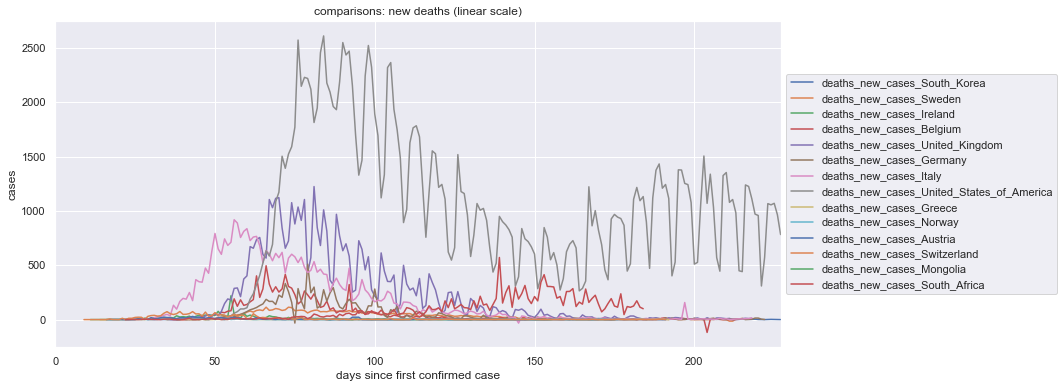

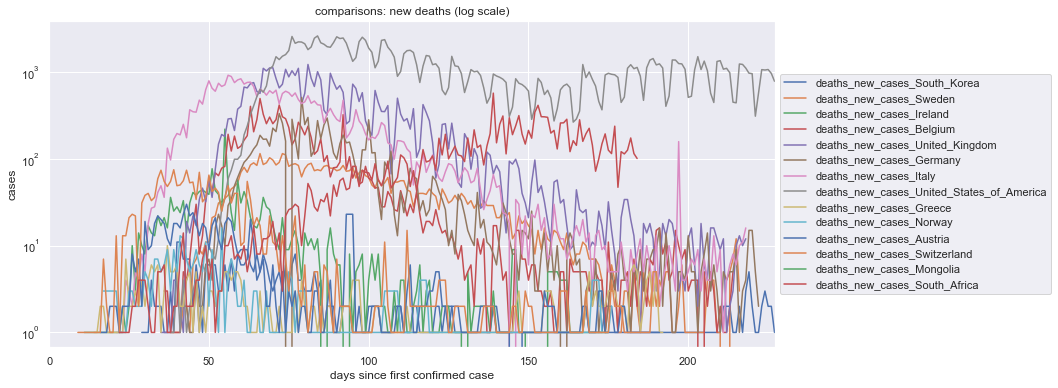

In [30]:
__df = _df[[
    'deaths_new_cases_South_Korea',
    'deaths_new_cases_Sweden',
    'deaths_new_cases_Ireland',
    'deaths_new_cases_Belgium',
    'deaths_new_cases_United_Kingdom',
    'deaths_new_cases_Germany',
    'deaths_new_cases_Italy',
    'deaths_new_cases_United_States_of_America',
    'deaths_new_cases_Greece',
    'deaths_new_cases_Norway',
    'deaths_new_cases_Austria',
    'deaths_new_cases_Switzerland',
    'deaths_new_cases_Mongolia',
    'deaths_new_cases_South_Africa']]
display(__df.tail())

title = 'comparisons: new deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

deaths_new_cases_Sweden  deaths_new_cases_Belgium  \
223                      NaN                       NaN   
224                      NaN                       NaN   
225                      NaN                       NaN   
226                      NaN                       NaN   
227                      NaN                       NaN   

     deaths_new_cases_Ireland  deaths_new_cases_United_Kingdom  \
223                       NaN                              NaN   
224                       NaN                              NaN   
225                       NaN                              NaN   
226                       NaN                              NaN   
227                       NaN                              NaN   

     deaths_new_cases_Germany  deaths_new_cases_Italy  \
223                       NaN                     NaN   
224                       NaN                     NaN   
225                       NaN                     NaN   
226                       NaN                     NaN   
227                       NaN                     NaN   

     deaths_new_cases_Greece  deaths_new_cases_Norway  \
223                      NaN                      NaN   
224                      NaN                      NaN   
225                      NaN                      NaN   
226                      NaN                      NaN   
227                      NaN                      NaN   

     deaths_new_cases_Austria  deaths_new_cases_Switzerland  
223                       NaN                           NaN  
224                       NaN                           NaN  
225                       NaN                           NaN  
226                       NaN                           NaN  
227                       NaN                           NaN

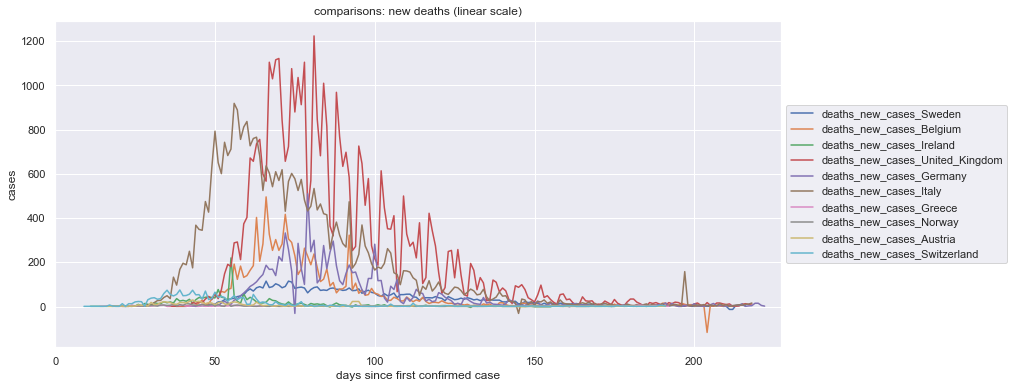

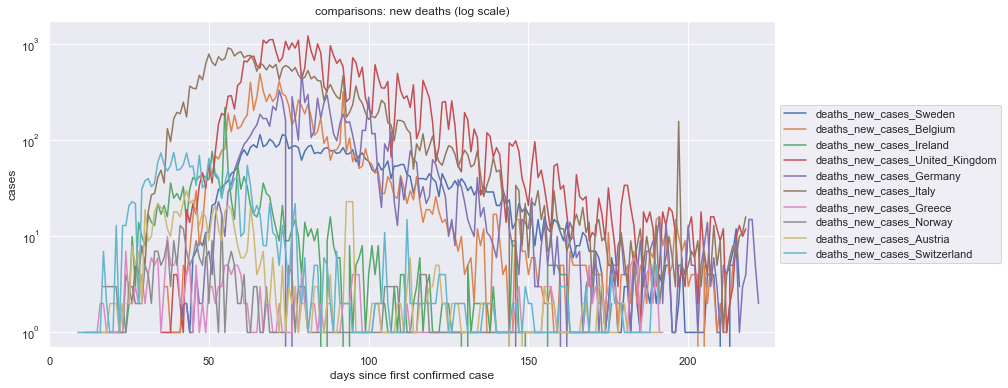

In [31]:
# European
__df = _df[[
    'deaths_new_cases_Sweden',
    'deaths_new_cases_Belgium',
    'deaths_new_cases_Ireland',
    'deaths_new_cases_United_Kingdom',
    'deaths_new_cases_Germany',
    'deaths_new_cases_Italy',
    'deaths_new_cases_Greece',
    'deaths_new_cases_Norway',
    'deaths_new_cases_Austria',
    'deaths_new_cases_Switzerland']]
display(__df.tail())

title = 'comparisons: new deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: changes in confirmed cases

confirmed_percentage_change_South_Korea  \
223                                 1.322961   
224                                 0.953592   
225                                 0.959116   
226                                 0.806065   
227                                 0.794860   

     confirmed_percentage_change_Sweden  confirmed_percentage_change_Ireland  \
223                                 NaN                                  NaN   
224                                 NaN                                  NaN   
225                                 NaN                                  NaN   
226                                 NaN                                  NaN   
227                                 NaN                                  NaN   

     confirmed_percentage_change_Belgium  \
223                                  NaN   
224                                  NaN   
225                                  NaN   
226                                  NaN   
227                                  NaN   

     confirmed_percentage_change_United_Kingdom  \
223                                         NaN   
224                                         NaN   
225                                         NaN   
226                                         NaN   
227                                         NaN   

     confirmed_percentage_change_Germany  confirmed_percentage_change_Italy  \
223                                  NaN                                NaN   
224                                  NaN                                NaN   
225                                  NaN                                NaN   
226                                  NaN                                NaN   
227                                  NaN                                NaN   

     confirmed_percentage_change_United_States_of_America  \
223                                           0.717227      
224                                           0.653129      
225                                           0.597137      
226                                           0.821169      
227                                           0.716908      

     confirmed_percentage_change_Greece  confirmed_percentage_change_Norway  \
223                                 NaN                                 NaN   
224                                 NaN                                 NaN   
225                                 NaN                                 NaN   
226                                 NaN                                 NaN   
227                                 NaN                                 NaN   

     confirmed_percentage_change_Austria  \
223                                  NaN   
224                                  NaN   
225                                  NaN   
226                                  NaN   
227                                  NaN   

     confirmed_percentage_change_Switzerland  \
223                                      NaN   
224                                      NaN   
225                                      NaN   
226                                      NaN   
227                                      NaN   

     confirmed_percentage_change_Mongolia  \
223                                   NaN   
224                                   NaN   
225                                   NaN   
226                                   NaN   
227                                   NaN   

     confirmed_percentage_change_South_Africa  
223                                       NaN  
224                                       NaN  
225                                       NaN  
226                                       NaN  
227                                       NaN

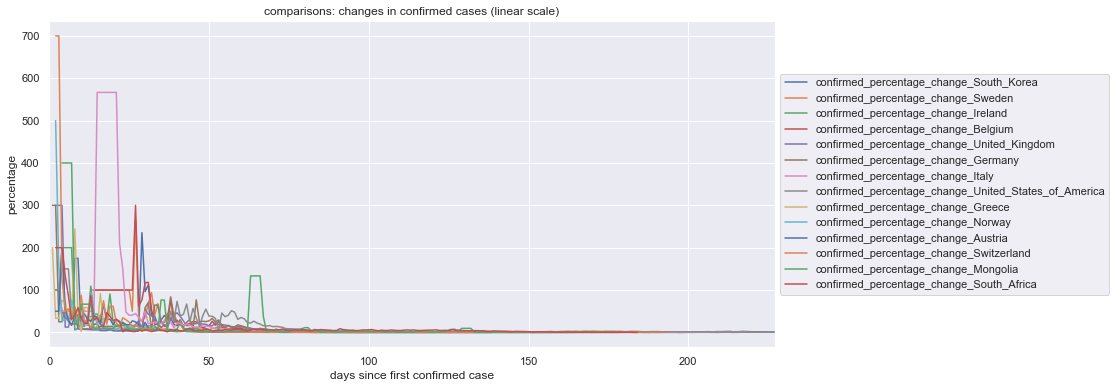

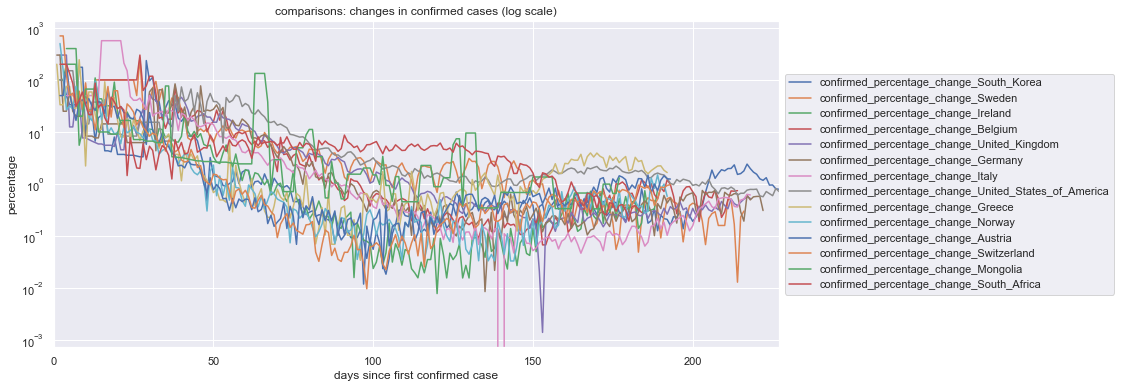

In [32]:
__df = _df[[
    'confirmed_percentage_change_South_Korea',
    'confirmed_percentage_change_Sweden',
    'confirmed_percentage_change_Ireland',
    'confirmed_percentage_change_Belgium',
    'confirmed_percentage_change_United_Kingdom',
    'confirmed_percentage_change_Germany',
    'confirmed_percentage_change_Italy',
    'confirmed_percentage_change_United_States_of_America',
    'confirmed_percentage_change_Greece',
    'confirmed_percentage_change_Norway',
    'confirmed_percentage_change_Austria',
    'confirmed_percentage_change_Switzerland',
    'confirmed_percentage_change_Mongolia',
    'confirmed_percentage_change_South_Africa']]
display(__df.tail())

title = 'comparisons: changes in confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

deaths_percentage_change_South_Korea  deaths_percentage_change_Sweden  \
223                              0.617284                              NaN   
224                              0.920245                              NaN   
225                              0.607903                              NaN   
226                              0.604230                              NaN   
227                              0.300300                              NaN   

     deaths_percentage_change_Ireland  deaths_percentage_change_Belgium  \
223                               NaN                               NaN   
224                               NaN                               NaN   
225                               NaN                               NaN   
226                               NaN                               NaN   
227                               NaN                               NaN   

     deaths_percentage_change_United_Kingdom  \
223                                      NaN   
224                                      NaN   
225                                      NaN   
226                                      NaN   
227                                      NaN   

     deaths_percentage_change_Germany  deaths_percentage_change_Italy  \
223                               NaN                             NaN   
224                               NaN                             NaN   
225                               NaN                             NaN   
226                               NaN                             NaN   
227                               NaN                             NaN   

     deaths_percentage_change_United_States_of_America  \
223                                           0.581164   
224                                           0.571849   
225                                           0.576136   
226                                           0.516623   
227                                           0.417033   

     deaths_percentage_change_Greece  deaths_percentage_change_Norway  \
223                              NaN                              NaN   
224                              NaN                              NaN   
225                              NaN                              NaN   
226                              NaN                              NaN   
227                              NaN                              NaN   

     deaths_percentage_change_Austria  deaths_percentage_change_Switzerland  \
223                               NaN                                   NaN   
224                               NaN                                   NaN   
225                               NaN                                   NaN   
226                               NaN                                   NaN   
227                               NaN                                   NaN   

     deaths_percentage_change_Mongolia  deaths_percentage_change_South_Africa  
223                                NaN                                    NaN  
224                                NaN                                    NaN  
225                                NaN                                    NaN  
226                                NaN                                    NaN  
227                                NaN                                    NaN

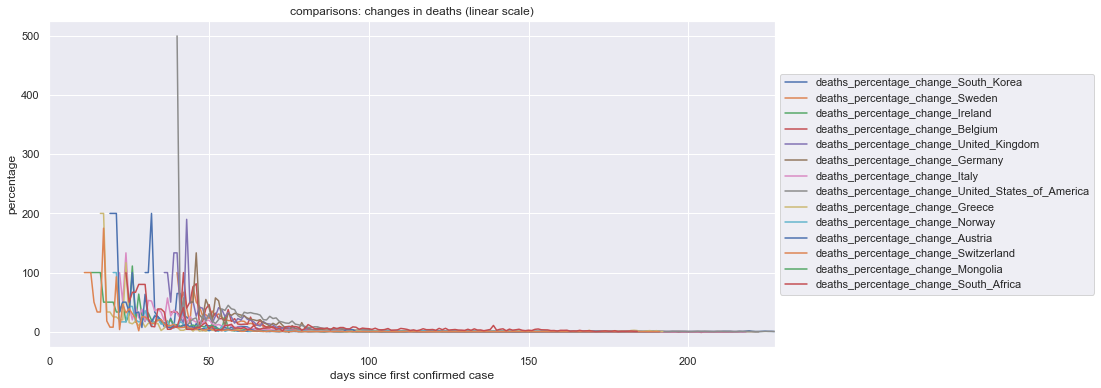

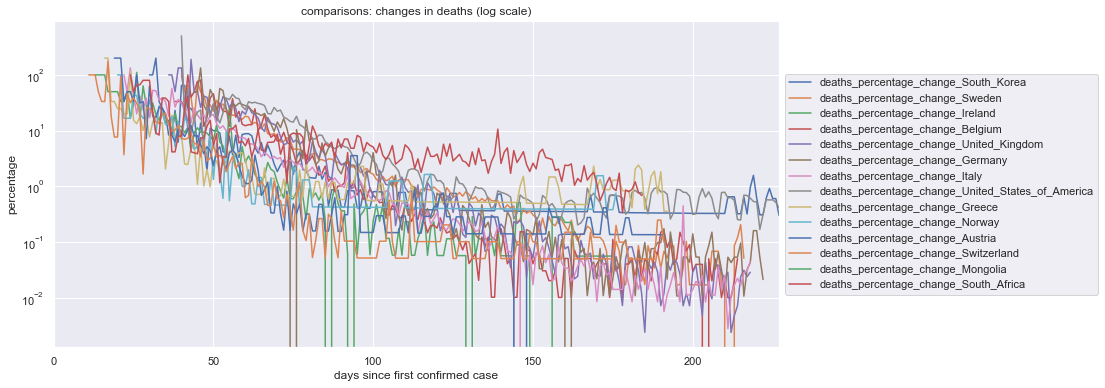

In [33]:
___df = _df[[
    'deaths_percentage_change_South_Korea',
    'deaths_percentage_change_Sweden',
    'deaths_percentage_change_Ireland',
    'deaths_percentage_change_Belgium',
    'deaths_percentage_change_United_Kingdom',
    'deaths_percentage_change_Germany',
    'deaths_percentage_change_Italy',
    'deaths_percentage_change_United_States_of_America',
    'deaths_percentage_change_Greece',
    'deaths_percentage_change_Norway',
    'deaths_percentage_change_Austria',
    'deaths_percentage_change_Switzerland',
    'deaths_percentage_change_Mongolia',
    'deaths_percentage_change_South_Africa']]
display(___df.tail())

title = 'comparisons: changes in deaths'
___df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
___df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

deaths_percentage_change_Sweden  deaths_percentage_change_Belgium  \
223                              NaN                               NaN   
224                              NaN                               NaN   
225                              NaN                               NaN   
226                              NaN                               NaN   
227                              NaN                               NaN   

     deaths_percentage_change_Ireland  \
223                               NaN   
224                               NaN   
225                               NaN   
226                               NaN   
227                               NaN   

     deaths_percentage_change_United_Kingdom  \
223                                      NaN   
224                                      NaN   
225                                      NaN   
226                                      NaN   
227                                      NaN   

     deaths_percentage_change_Germany  deaths_percentage_change_Italy  \
223                               NaN                             NaN   
224                               NaN                             NaN   
225                               NaN                             NaN   
226                               NaN                             NaN   
227                               NaN                             NaN   

     deaths_percentage_change_Greece  deaths_percentage_change_Norway  \
223                              NaN                              NaN   
224                              NaN                              NaN   
225                              NaN                              NaN   
226                              NaN                              NaN   
227                              NaN                              NaN   

     deaths_percentage_change_Austria  deaths_percentage_change_Switzerland  
223                               NaN                                   NaN  
224                               NaN                                   NaN  
225                               NaN                                   NaN  
226                               NaN                                   NaN  
227                               NaN                                   NaN

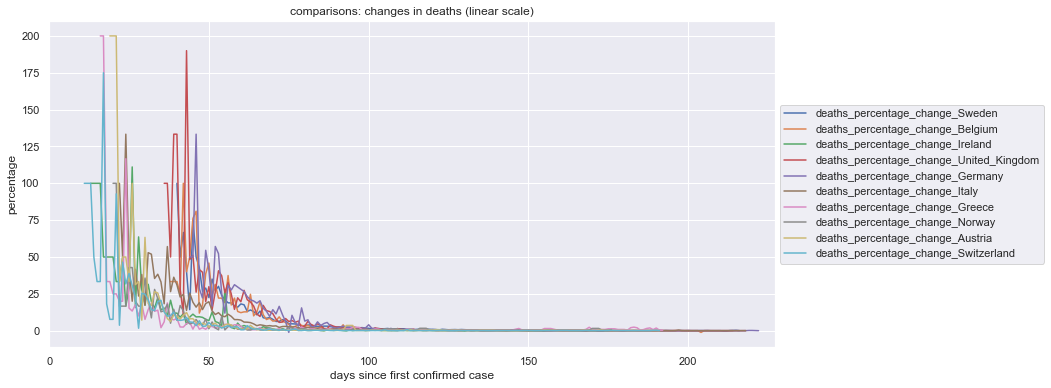

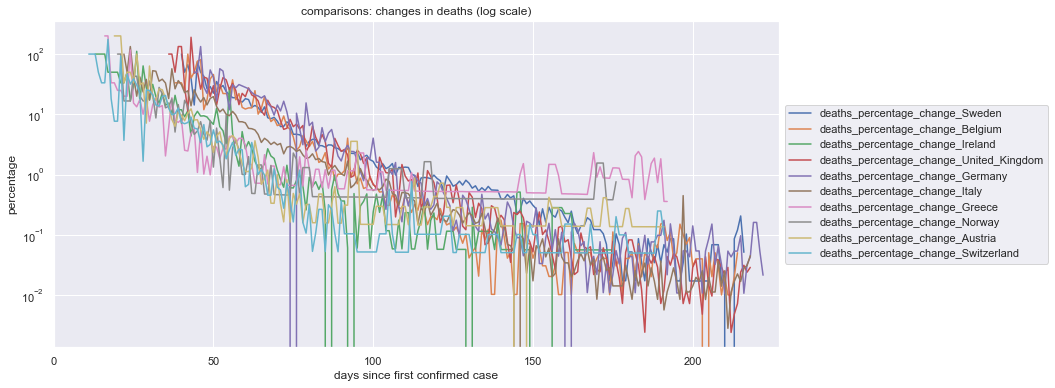

In [34]:
# some European countries
___df = _df[[
    'deaths_percentage_change_Sweden',
    'deaths_percentage_change_Belgium',
    'deaths_percentage_change_Ireland',
    'deaths_percentage_change_United_Kingdom',
    'deaths_percentage_change_Germany',
    'deaths_percentage_change_Italy',
    'deaths_percentage_change_Greece',
    'deaths_percentage_change_Norway',
    'deaths_percentage_change_Austria',
    'deaths_percentage_change_Switzerland']]
display(___df.tail())

title = 'comparisons: changes in deaths'
___df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
___df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');